In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix , ConfusionMatrixDisplay
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#!pip install zipcodes
import zipcodes as zcode
from sklearn.tree import DecisionTreeClassifier
df_loan = pd.read_csv(r"file:///E:\DS - Sohini\Class 21 - Personal Loan data\Bank_Personal_Loan_Modelling.csv")


In [2]:
df_loan

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [3]:
df_loan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
#get the size of dataframe
print("rows : ", df_loan.shape[0]) #get the number of rows/obs
print("columns : ", df_loan.shape[1]) #get the number of columns

print("#"*40,"\n", "Features : \n\n", df_loan.columns.tolist()) #get the columns/features
print("#"*40,"\n", "Missing values : \n\n", df_loan.isnull().sum().sort_values(ascending=False)) 

print("#"*40,"\n", "Percent of missing : \n\n", round(df_loan.isna().sum() / df_loan.isna().count()*100,2)) 
print("#"*40,"\n", "Unique values : \n\n", df_loan.nunique()) #get the columns/features



rows :  5000
columns :  14
######################################## 
 Features : 

 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
######################################## 
 Missing values : 

 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
######################################## 
 Percent of missing : 

 ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securi

In [5]:
df_loan.drop(['ID'], axis=1, inplace=True)

In [6]:
df_loan.rename(columns={"ZIP Code" : "ZIPCode", "Personal Loan" : "PersonalLoan", "Securities Account" : "SecuritiesAccount", "CD Account" : "CDAccount"}, inplace=True)

In [7]:
df_loan.ZIPCode.nunique()

467

In [8]:
# get unique zipcodes
list_zipcode = df_loan.ZIPCode.unique()

In [9]:
#here i am creating a dictionary of county by using library zipcode and matching method.
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})

In [10]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [11]:
dict_zip.update({92717 : 'Orange County'})
dict_zip.update({92634 : 'Orange County'})

In [12]:
df_loan['Country'] = df_loan["ZIPCode"].map(dict_zip)

In [13]:
df_loan.Country.nunique()

40

In [14]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  Country            5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [15]:
# converting categorical variable to category type
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 
                'CreditCard', 'ZIPCode', 'Education','Country']
df_loan[category_col] = df_loan[category_col].astype('category')

In [16]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  Country            5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


In [17]:
df_loan[df_loan['Experience']<0].sort_values(by='Experience', ascending=True).shape[0]

52

In [18]:
df_loan.loc[df_loan['Experience']<0,'Experience'] = np.abs(df_loan['Experience'])

In [19]:
df_loan[df_loan['Experience']==0]['Age'].shape[0]

66

In [20]:
df_loan[df_loan['Experience']==0]['Age'].describe()

count    66.000000
mean     25.636364
std       1.145377
min      24.000000
25%      25.000000
50%      26.000000
75%      26.000000
max      30.000000
Name: Age, dtype: float64

In [21]:
df_loan.describe().T

count       mean         std   min   25%   50%    75%    max
Age         5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   67.0
Experience  5000.0  20.134600   11.415189   0.0  10.0  20.0   30.0   43.0
Income      5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0  224.0
CCAvg       5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   10.0
Mortgage    5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0  635.0

In [22]:
for column in category_col:
    print(df_loan[column].value_counts())
    print('#' * 40)

0    4520
1     480
Name: PersonalLoan, dtype: int64
########################################
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
########################################
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
########################################
0    4698
1     302
Name: CDAccount, dtype: int64
########################################
1    2984
0    2016
Name: Online, dtype: int64
########################################
0    3530
1    1470
Name: CreditCard, dtype: int64
########################################
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: ZIPCode, Length: 467, dtype: int64
########################################
1    2096
3    1501
2    1403
Name: Education, dtype: int64
########################################
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda C

Observations

Customers age is in range of 23 - 67, with mean and median of ~45.
Maximum experience is 43 years. where as mean and median are ~20.
Income are in range 8k to 224k USD. Mean is 73k USD and median is 64k USD. 224 Max salary need to be verified
Maximum mortgage taken is 635k USD.Need to verify this
Average spending on credit card per month ranges from 1- 10k with mean of 1.9kUSD and median of 1.5k USD
1095 customers are from Los Angeles County.
480 customers had borrowed loan before.

# Univariate Analysis

In [23]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continuous variable
 # to check spread, central tendancy, dispersion and outliers

    Name = data.name.upper()
    fig,(ax_box, ax_dis) = plt.subplots(nrows=2, sharex=True, gridspec_kw = {"height_ratios" : (.25, .75)}, figsize=(8,5))
    
    mean= data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    
    sns.set_theme(style="white")
    fig.suptitle('SPREAD OF DATA FOR ' + Name , fontsize=18, fontweight='bold')
    sns.boxplot(x=data, showmeans=True, orient='h', color='violet', ax=ax_box)
    ax_box.set(xlabel='')
    
    #just trying to make visualization better. This will set background to white
    sns.despine(top=True, right=True, left=True) # to remove side line from graph
    
    sns.distplot(data, kde=False, color='blue', ax=ax_dis)
    
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='--', linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='--', linewidth=2)
    
    plt.legend({'Mean' : mean, 'Median' : median, 'Mode' : mode})

C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\297606852.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=False, color='blue', ax=ax_dis)
C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\297606852.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=False, color='blue',

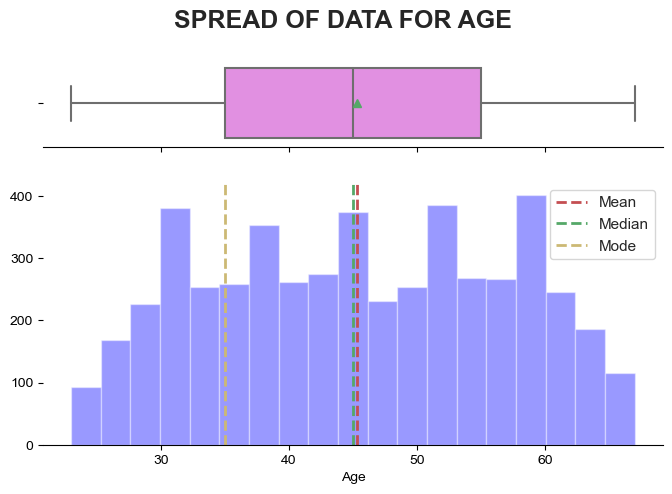

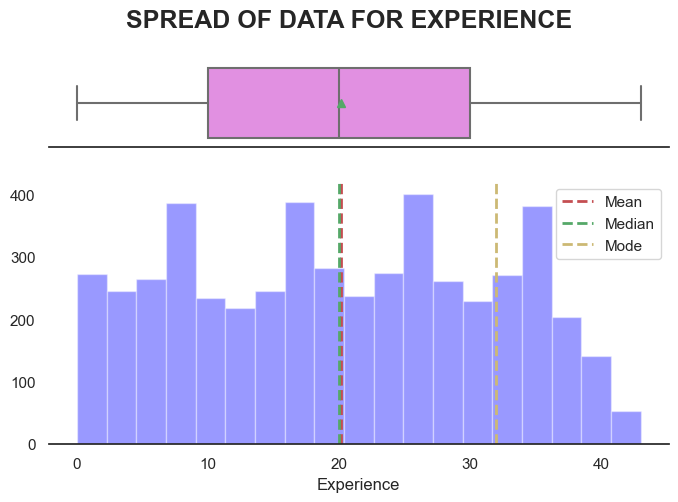

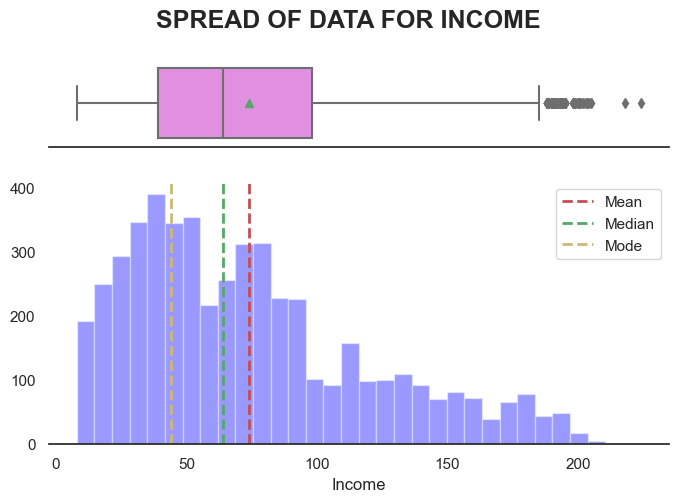

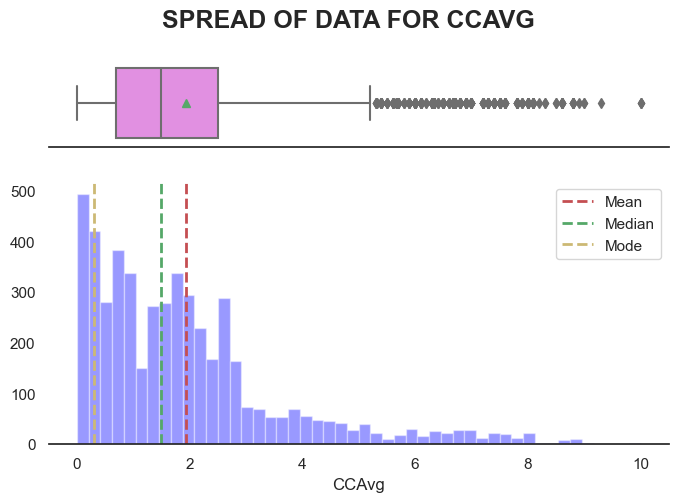

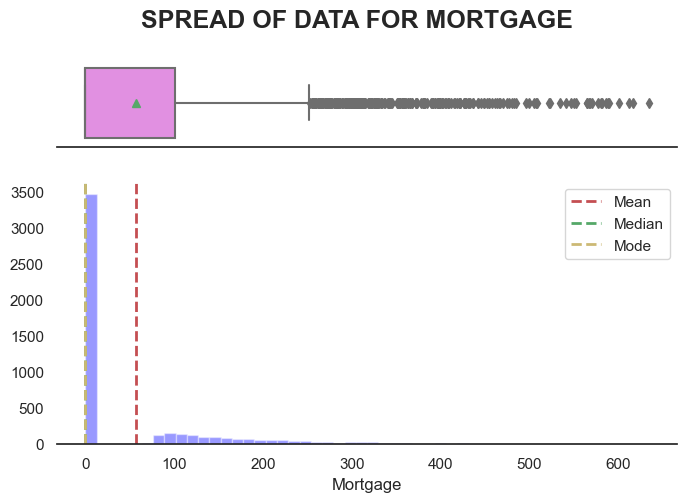

In [24]:
#select all quantitative columns for checking the spread
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(df_loan[list_col[i]])

In [25]:
df_loan['Agebin'] = pd.cut(df_loan['Age'], bins= [0,30,40,50,60,100], labels = ['18-30','31-40', '41-50', '51-60', '61-100'])

Observations

Age and experience both has same distrubtion with spike at 5 points.
Income is right skewed and has some outlier on higher side which can be clipped.
Average montly credit is right skewed and has lot of outliers on higher side which can be clipped.
Mortgage is mostly 0 . but is right skewed and has lot of outlier on higher side which can be clipped

In [26]:
df_loan["Income_group"] = pd.cut(
    x=df_loan["Income"],
    bins=[0,50,140,224],
    labels=["Lower",'Middle',"High"],
)

In [27]:
df_loan.CCAvg.describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [28]:
df_loan["Spending_group"] = pd.cut( x=df_loan["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000], labels = ['Low', "Medium", 'High'],
                                  include_lowest=True,
                                  )

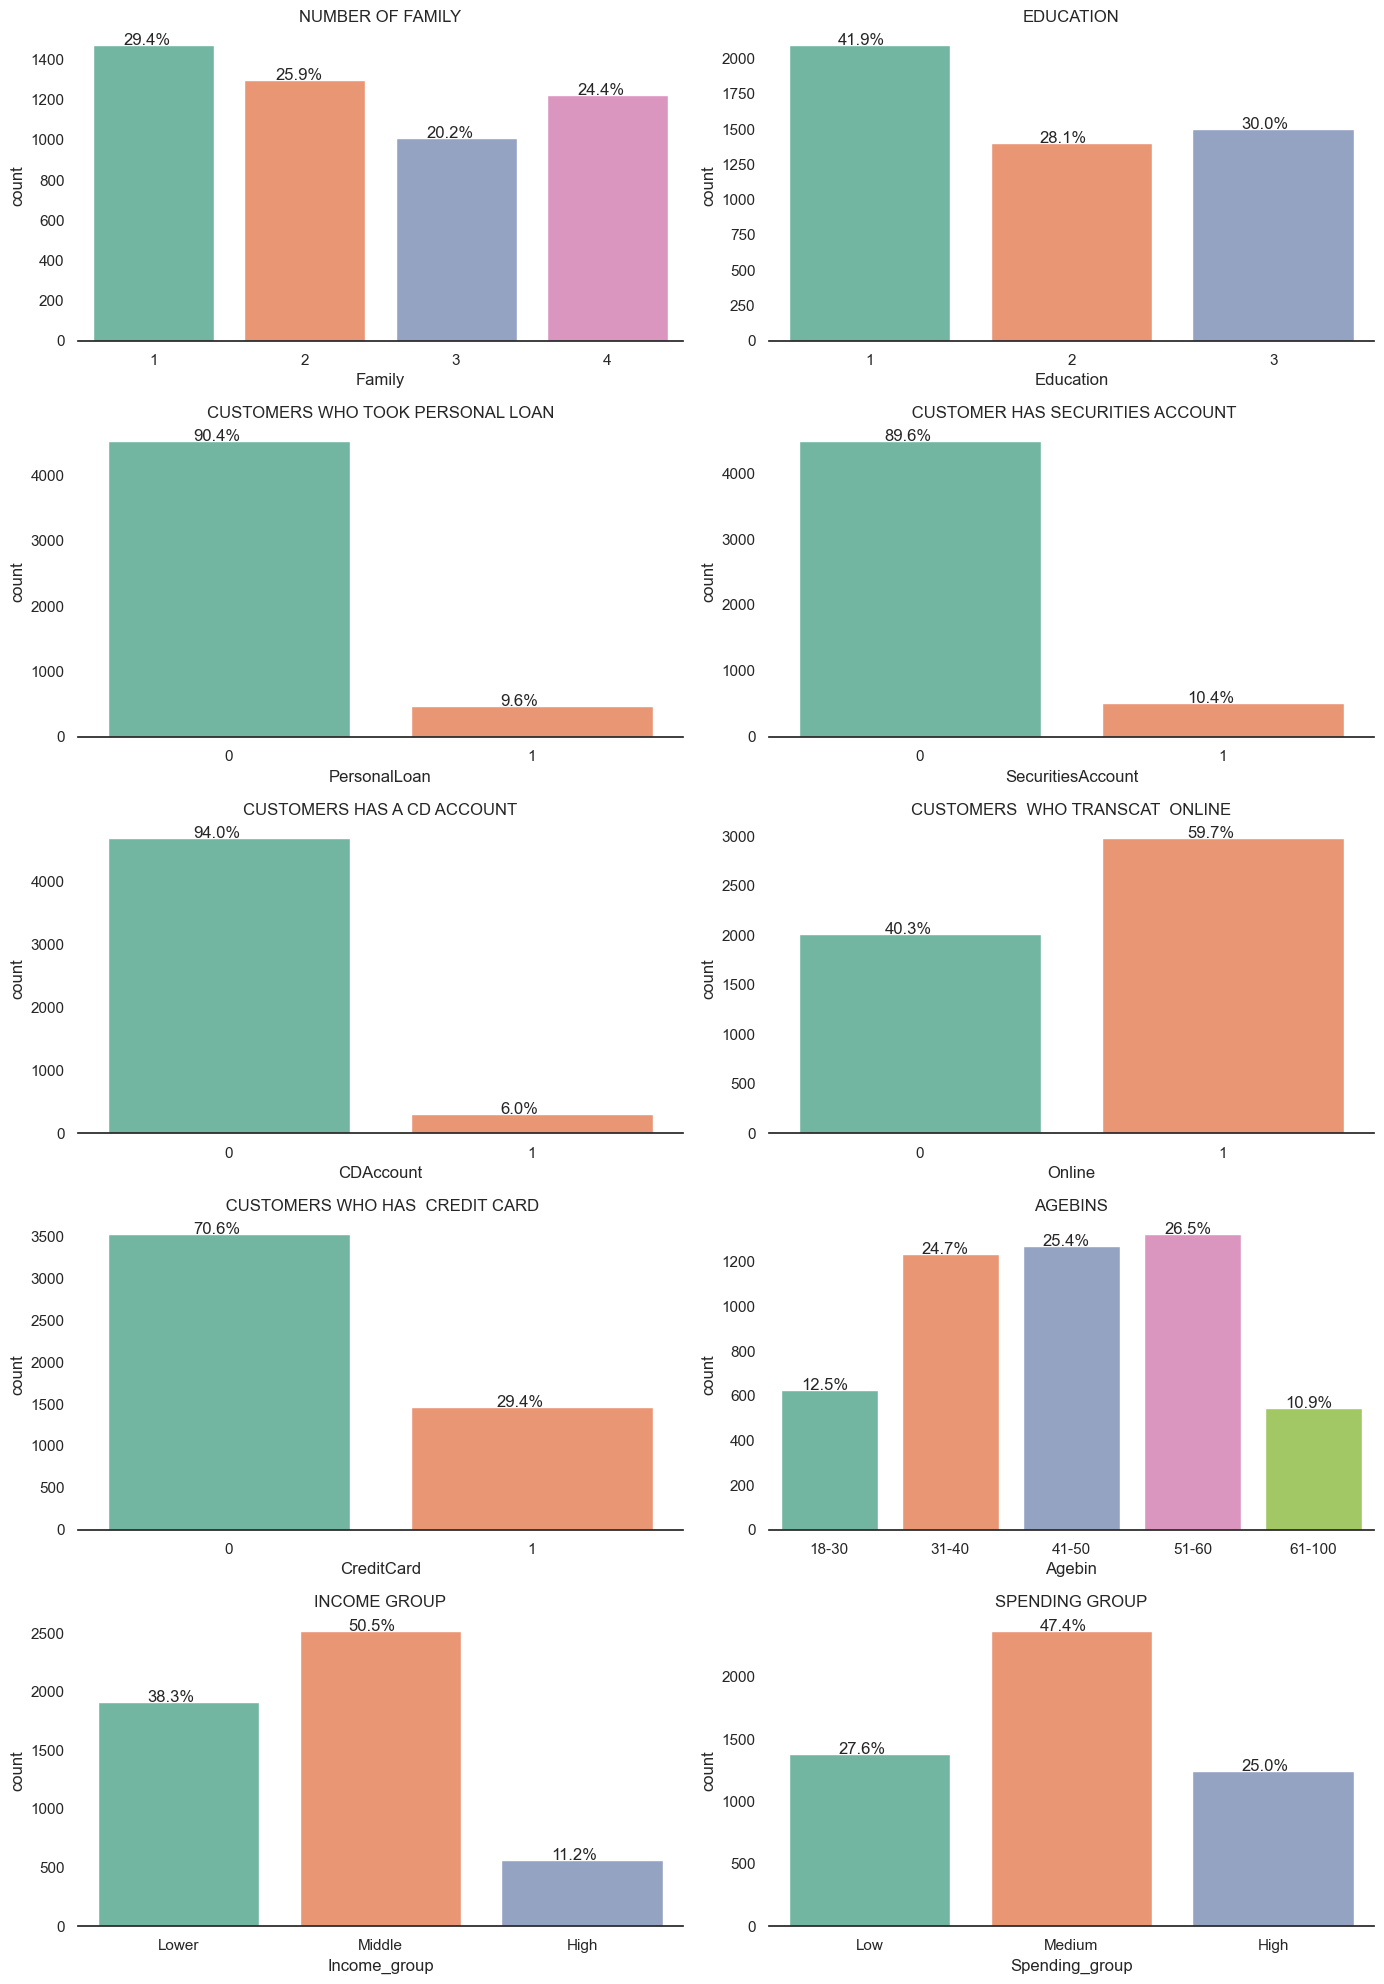

In [29]:
# Making a list of all categorical variables
cat_columns = ['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']

plt.figure(figsize=(14,20))

sns.set_theme(style="white") #just trying to make visulaization better. this will set background to white

for i, variable in enumerate(cat_columns):
                        plt.subplot(5,2,i+1)
                        order = df_loan[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                        sns.set_palette('Set2')
                        ax=sns.countplot(x=df_loan[variable], data=df_loan )
                        sns.despine(top=True,right=True,left=True)

                     # to remove side line from graph
                        for p in ax.patches:
                            percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_loan[variable]))
                            x = p.get_x() + p.get_width() / 2 - 0.04
                            y = p.get_y() + p.get_height()
                            plt.annotate(percentage, (x, y),ha='center')
                        plt.tight_layout()
                        plt.title(title[i].upper())

Observations

~29.4 % customers are single.
~41.9% customers are undergrad.
~9.6% bought a personal loan from the bank.
10.4 % customers have a securities account with the bank
6 % customer have a CD account.
60% customers transact online.
29.4% customers have credit cards.
~ 75 % of customers are in range of 31- 60.
~ 50 % Most of bank customers belong to middle income group.
~48 % of customers has medium Average spending

In [30]:
df_loan.groupby(['Country','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

size     
PersonalLoan              0    1
Country                         
9307                      1    0
96651                     6    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange County           333   33
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

<Axes: ylabel='Country'>

<Figure size 1500x2400 with 0 Axes>

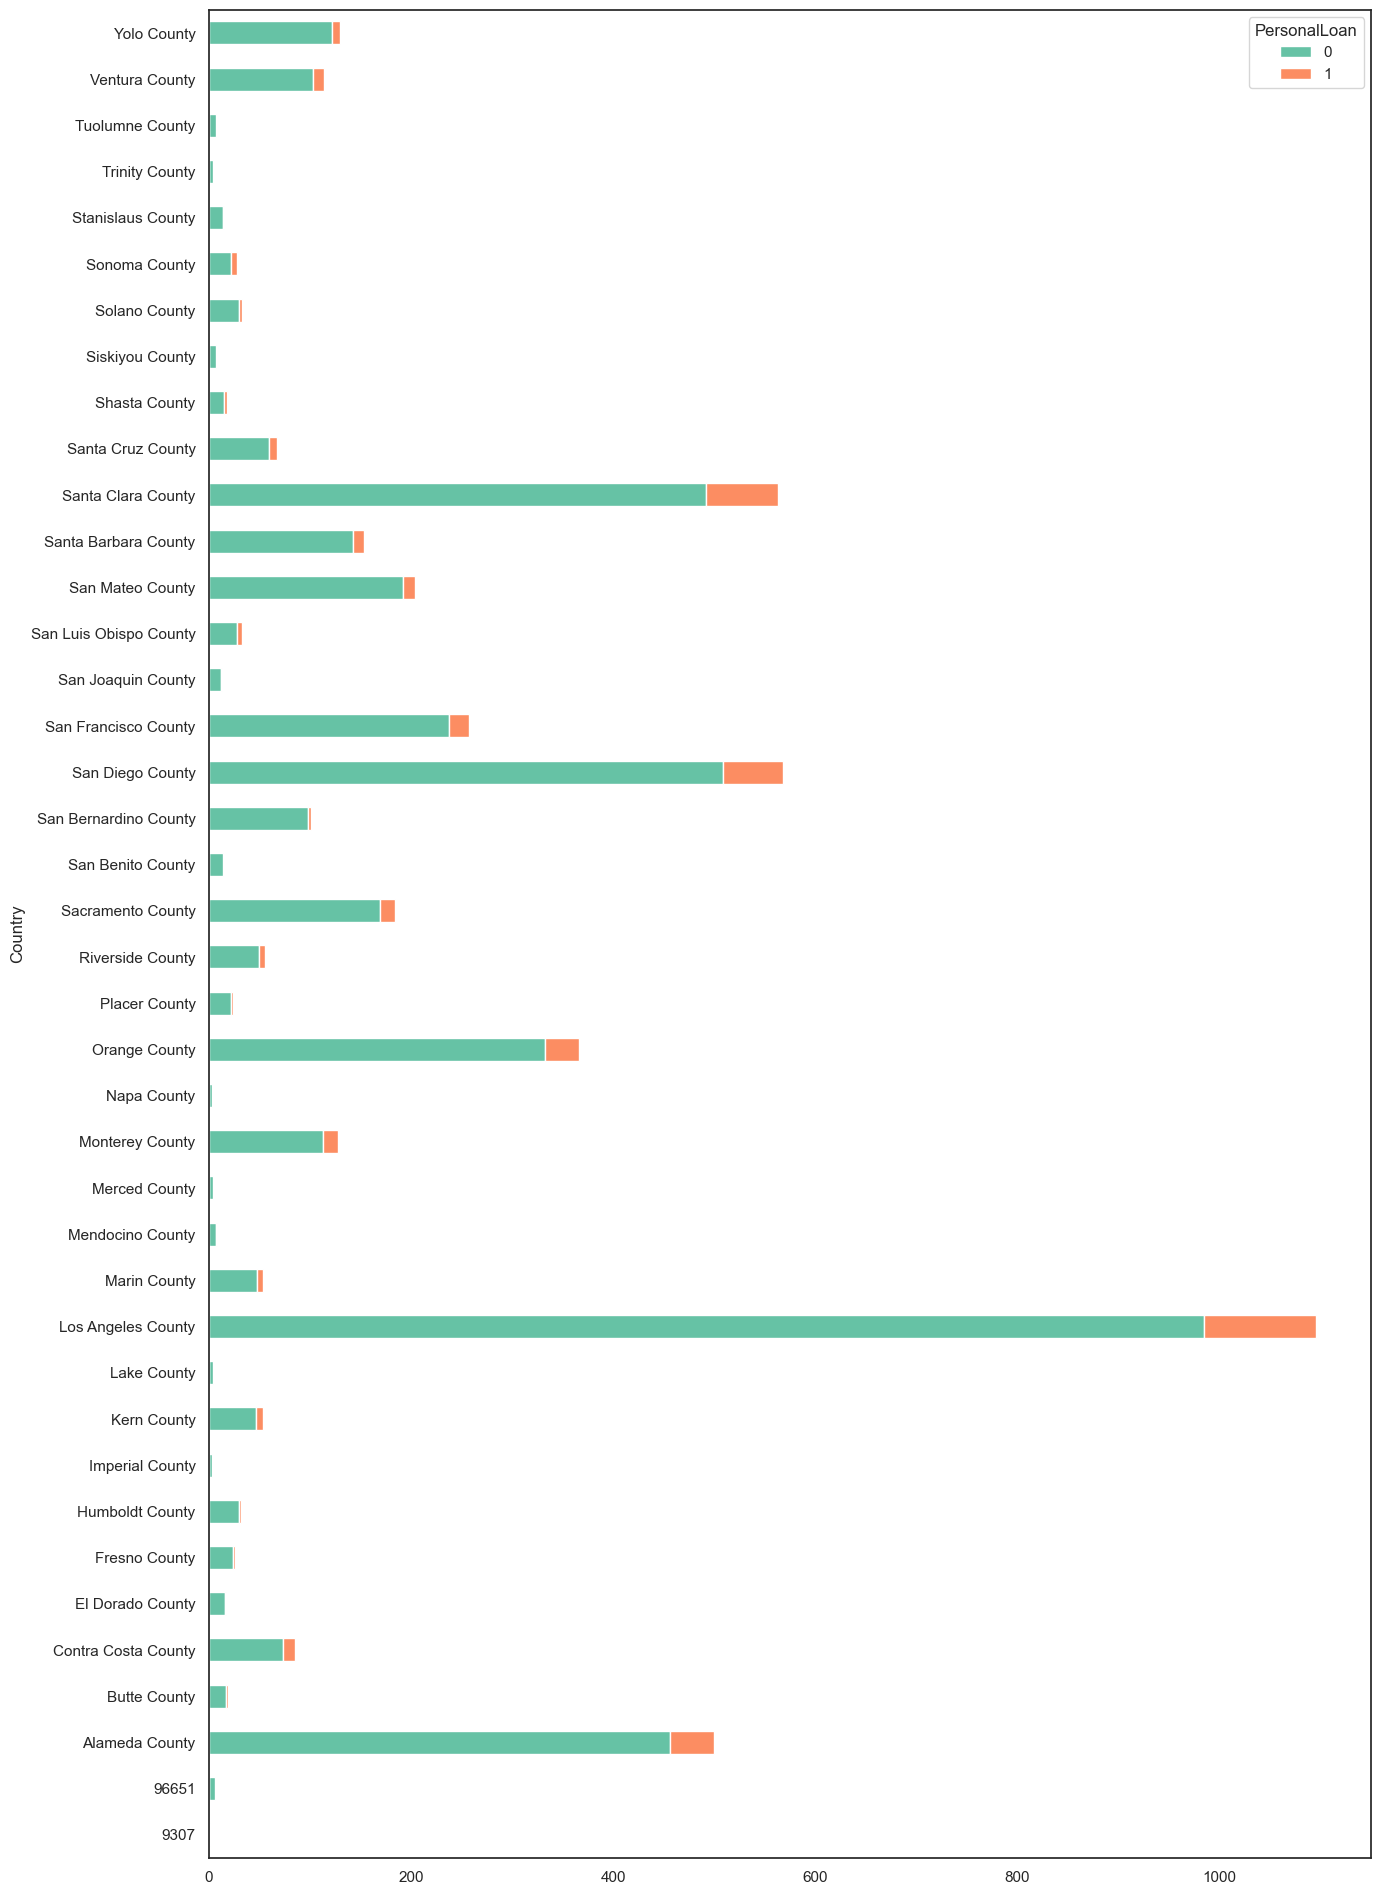

In [31]:
plt.figure(figsize=(15,24))
pd.crosstab(index=df_loan['Country'], columns=df_loan['PersonalLoan'].sort_values(ascending=False)).plot(kind='barh', stacked=True,figsize=(15,24)) 

In [32]:
countries = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'Orange Country':'Southern',  
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',            
'San Bernardino County':'Southern',      
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',          
'Riverside County':'Southern',            
'Kern County':'Southern',                
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',    
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',              
'Placer County':'Central',                
'Butte County':'Superior',              
'Shasta County':'Superior',                
'El Dorado County':'Central',            
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',          
'Mendocino County':'Superior',            
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                
'Napa County':'Bay Area',                  
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

In [33]:
df_loan['Region'] = df_loan['Country'].map(countries)

In [34]:
df_loan['Region'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', nan], dtype=object)

In [35]:
df_loan.isnull().sum()

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
Country              0
Agebin               0
Income_group         0
Spending_group       0
Region               1
dtype: int64

In [36]:
df_loan.dropna(inplace=True)

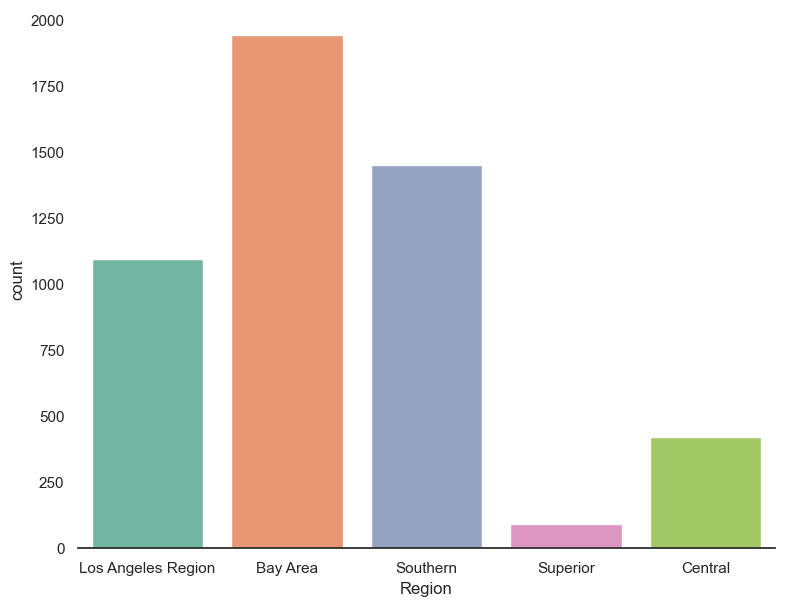

In [37]:
plt.figure(figsize=(9,7))
sns.countplot(data=df_loan, x=df_loan['Region'])
sns.despine(top=True, right=True, left=True) # to remove side line from graph

C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\1879395235.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_loan.corr(), annot=True)


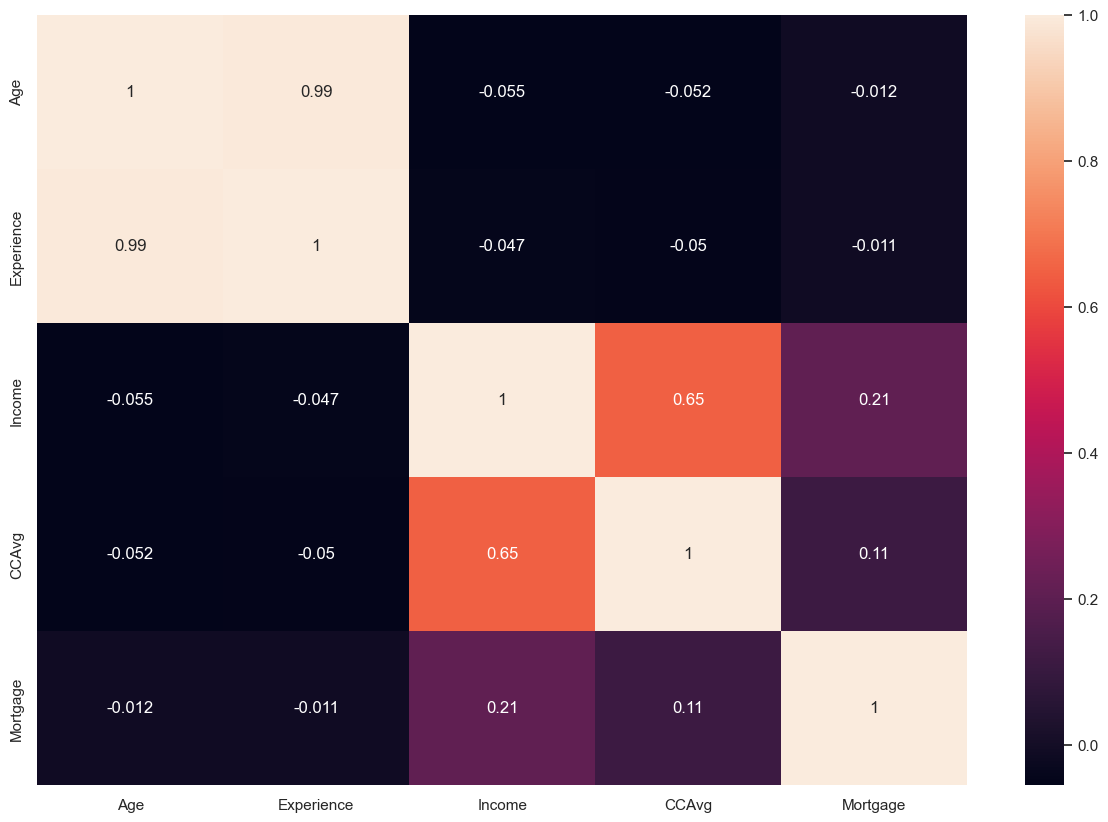

In [38]:
sns.set_palette(sns.color_palette("Set2",8))
plt.figure(figsize=(15,10))
sns.heatmap(df_loan.corr(), annot=True)
plt.show()

Observations

As expected Age and experience are highly correlated and one of them can be dropped.Since we had to handle 0, will drop experience.
Income and Average spending on credit card are positively corrleated.
Mortgage has very little correlation with income

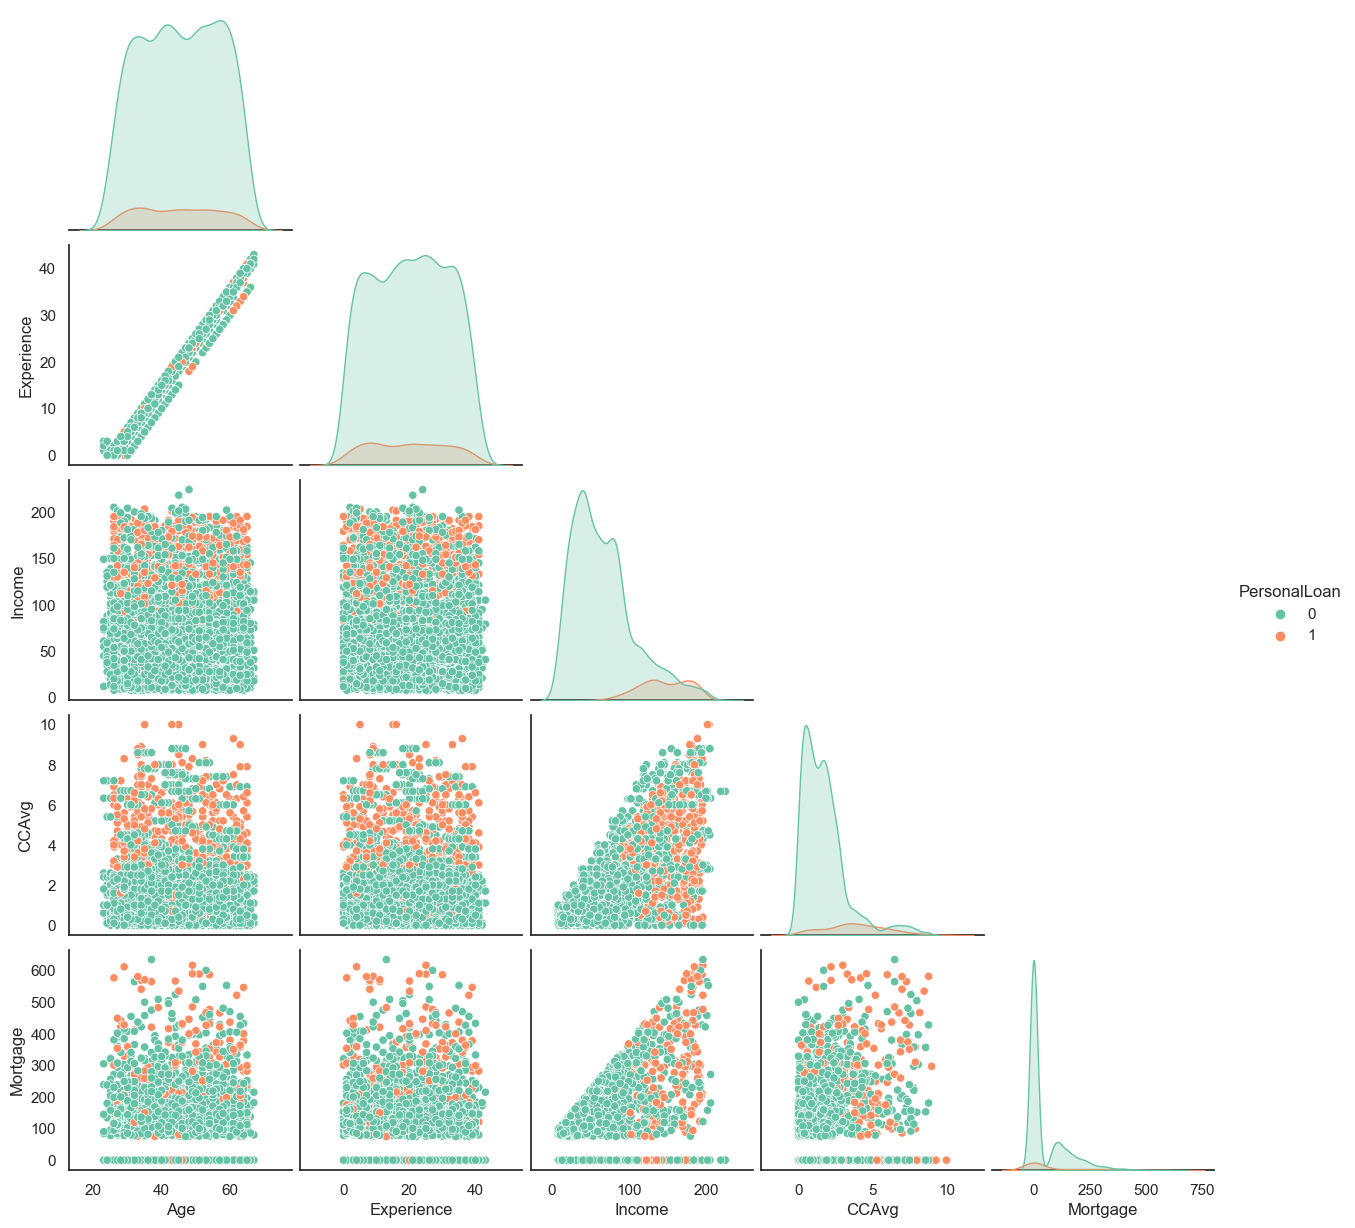

In [39]:
sns.set_palette(sns.color_palette('Set2',8))
sns.pairplot(df_loan, hue='PersonalLoan', corner=True)
plt.show()

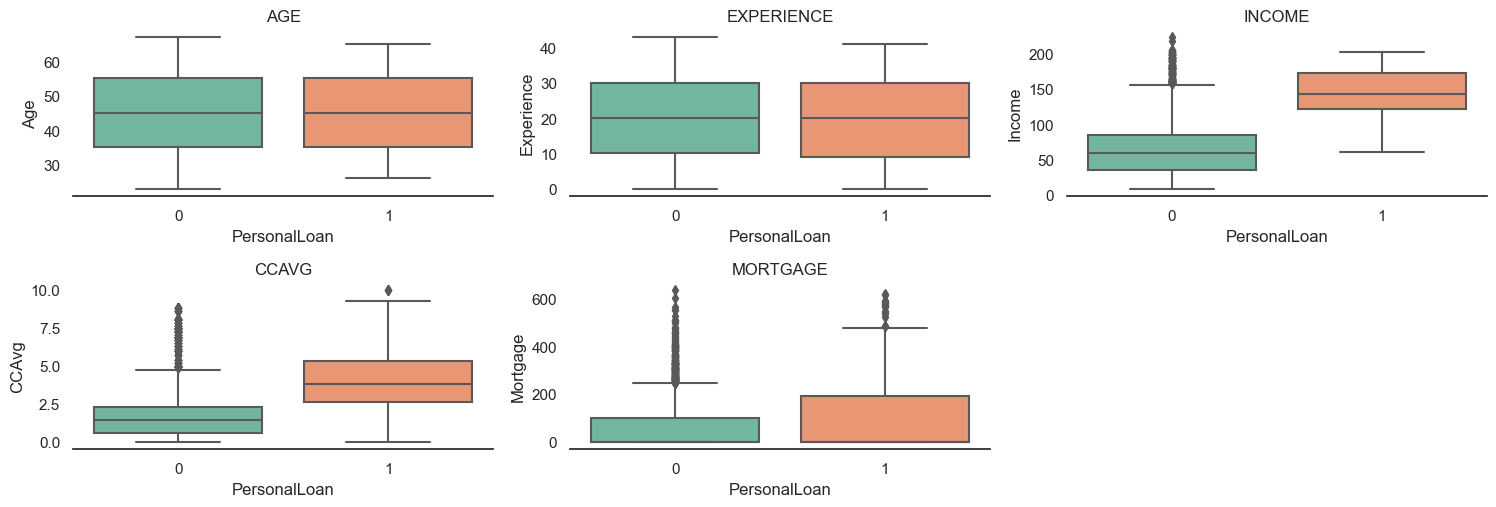

In [40]:
numeric_columns = ['Age','Experience', 'Income', 'CCAvg', 'Mortgage']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set2",8))
for i, variable in enumerate(numeric_columns):
    plt.subplot(10,3,i+1)
    
    sns.boxplot(x='PersonalLoan', y=df_loan[variable], data=df_loan)
    sns.despine(top=True, right=True, left=True)
    plt.tight_layout()
    plt.title(variable.upper())


C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\3721488945.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['CCAvg'], color = 'g')
C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\3721488945.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_loan[d

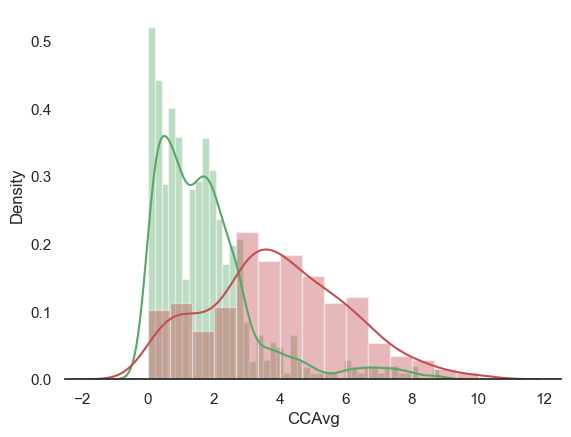

In [41]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['CCAvg'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['CCAvg'], color = 'r')
sns.despine(top=True, right=True, left=True)

C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\2208997857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Income'], color = 'g')
C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\2208997857.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_loan[

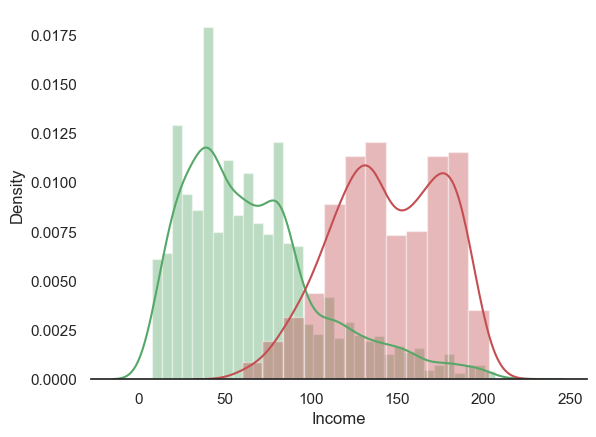

In [42]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Income'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Income'], color = 'r')
sns.despine(top=True, right=True, left=True)

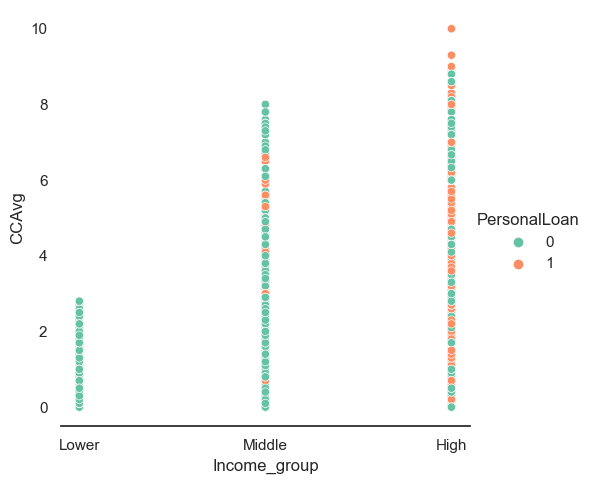

In [43]:
sns.relplot(x='Income_group', y='CCAvg', hue='PersonalLoan', data=df_loan)
sns.despine(top=True, right=True, left=True)

C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\162280833.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Mortgage'], color = 'g')
C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\162280833.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_loan[

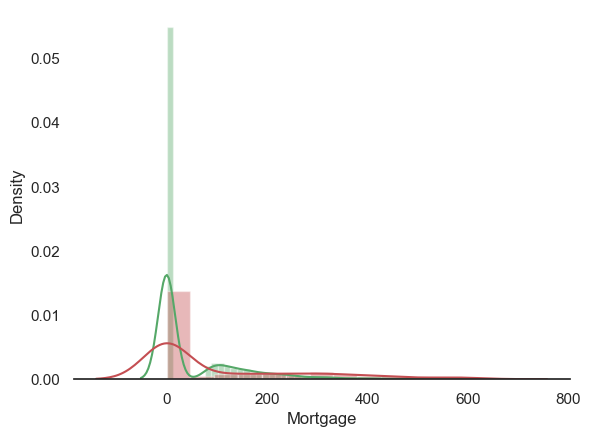

In [44]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Mortgage'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Mortgage'], color = 'r')
sns.despine(top=True, right=True, left=True)

C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


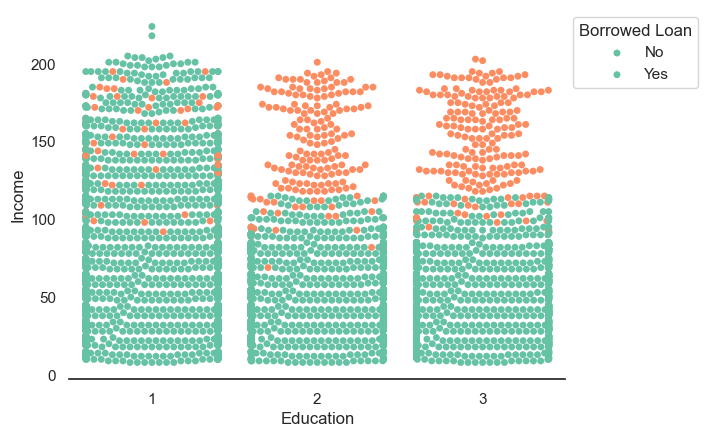

In [45]:
sns.swarmplot(x='Education', y='Income', hue='PersonalLoan', data=df_loan)
sns.despine(top=True, right=True, left=True) # to remove sideline from graph
labels=['No','Yes']
plt.legend(loc= 'lower left', frameon=False)
plt.legend(loc='upper left', labels=labels, title="Borrowed Loan", bbox_to_anchor=(1,1))


In [46]:
# countplot income CDacount in hue
# age and experience same we did for mortgage
# spending group ka count plot with personal loan in hue
# credit card avg spending and education, perosnal loan in hue
# subplot of income and agebin bar plot, perosnal_loan =1 then 0 hue=education
# catplot [ # subplot of income and agebin bar plot, perosnal_loan =1 then 0 hue=education ]
# stacked bar plot of all the categorical variables [ def function banake for loop me ]
# correlation coeffiecient of the list numerical=['Income','Age','Experience','CCAvg','Mortgage']
# pie chart of y variable
# logistic regression revise

C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\852470146.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Age'], color = 'g')
C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\852470146.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_loan[df_lo

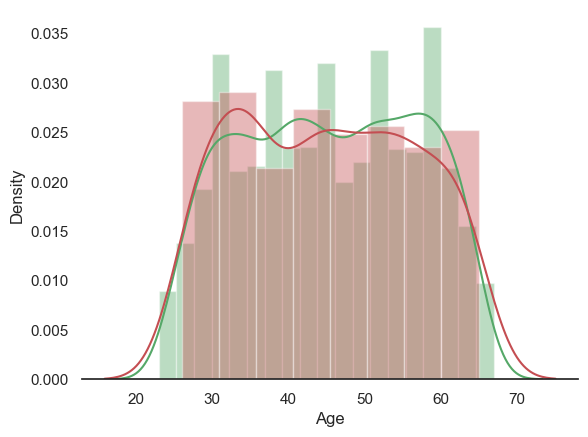

In [47]:
#age
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Age'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Age'], color = 'r')
sns.despine(top=True, right=True, left=True)

C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\3598600265.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Experience'], color = 'g')
C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\3598600265.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_l

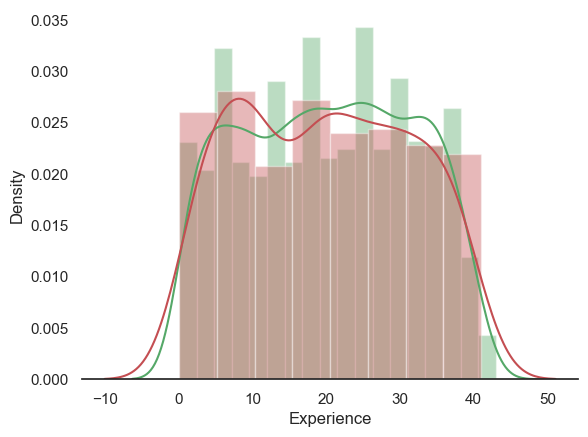

In [48]:
#age
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Experience'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Experience'], color = 'r')
sns.despine(top=True, right=True, left=True)

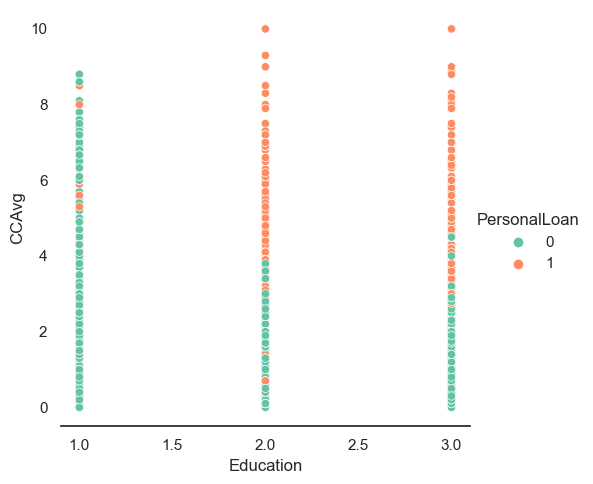

In [49]:
sns.relplot(x='Education', y='CCAvg', hue='PersonalLoan', data=df_loan)
sns.despine(top=True, right=True, left=True)

C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\2208997857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Income'], color = 'g')
C:\Users\deepa\AppData\Local\Temp\ipykernel_2172\2208997857.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_loan[

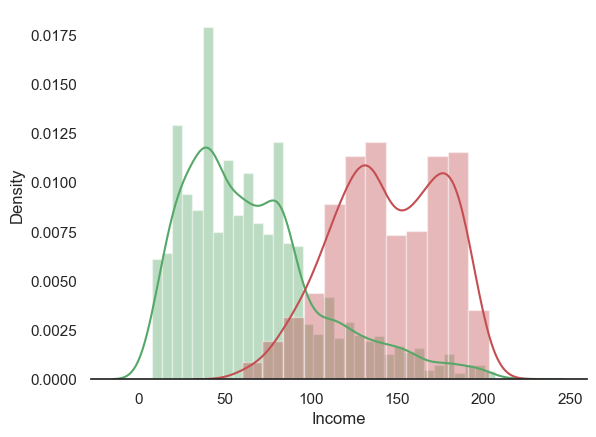

In [50]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Income'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Income'], color = 'r')
sns.despine(top=True, right=True, left=True)

Text(0.5, 1.0, 'plloan = 1')

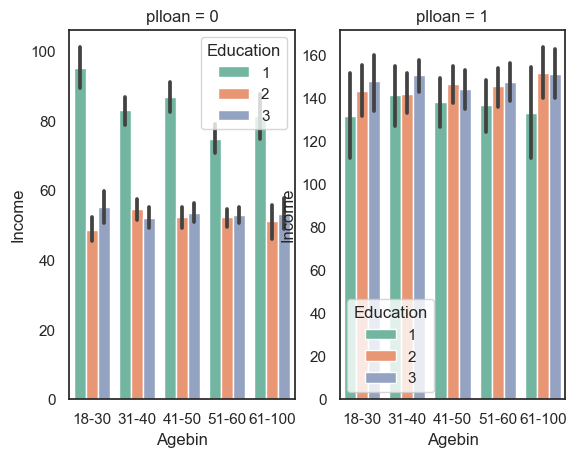

In [51]:
df1 = df_loan[df_loan['PersonalLoan'] == 0]
df2 = df_loan[df_loan['PersonalLoan'] == 1]
plt.subplot(1,2,1)
sns.barplot(y='Income', x='Agebin', hue='Education', data=df1)
plt.title('plloan = 0')
plt.subplot(1,2,2)
sns.barplot(y='Income', x='Agebin', hue='Education', data=df2)
plt.title('plloan = 1')


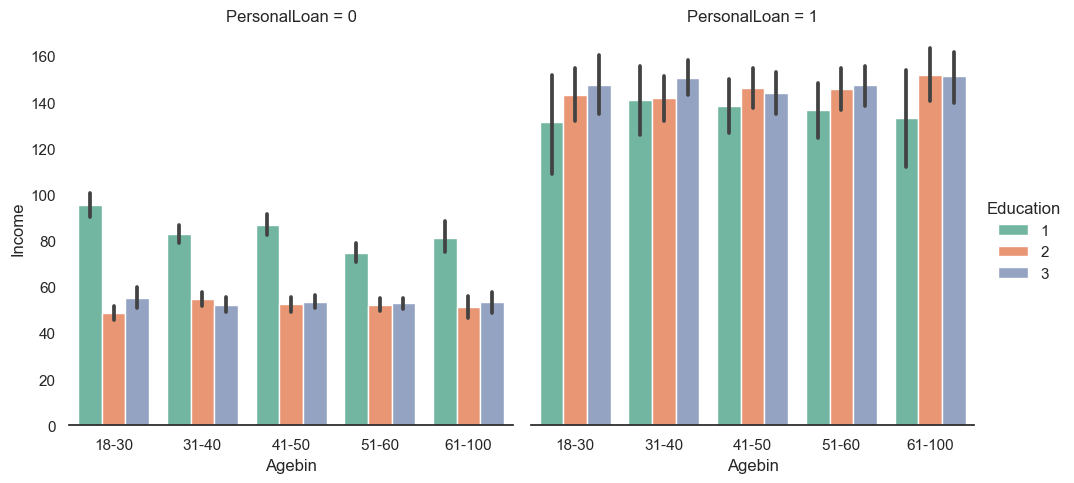

In [52]:
sns.catplot(y='Income', x='Agebin', hue='Education', kind='bar', col='PersonalLoan', data=df_loan)
sns.despine(top=True, right=True, left=True)

In [53]:
pd.crosstab(df_loan['Family'],df_loan['PersonalLoan'],margins=True)

PersonalLoan     0    1   All
Family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1087  134  1221
All           4519  480  4999

In [54]:
pd.crosstab(df_loan['Family'], df_loan['PersonalLoan'], normalize='index')

PersonalLoan         0         1
Family                          
1             0.927310  0.072690
2             0.918210  0.081790
3             0.868317  0.131683
4             0.890254  0.109746

In [55]:
# Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2",8))
    tab1=pd.crosstab(x,df_loan['PersonalLoan'],margins=True)
    
    print('-'*120)
    
    tab = pd.crosstab(x,df_loan['PersonalLoan'], normalize='index')
    tab.plot(kind='bar', stacked=True, figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    
    #plt.legend(loc='lower left', frameon=False)
    plt.legend(loc='upper left', labels=labels, title="Borrowed Loan", bbox_to_anchor=(1,1))
    
    sns.despine(top=True, right=True, left=True)
    plt.show()

------------------------------------------------------------------------------------------------------------------------


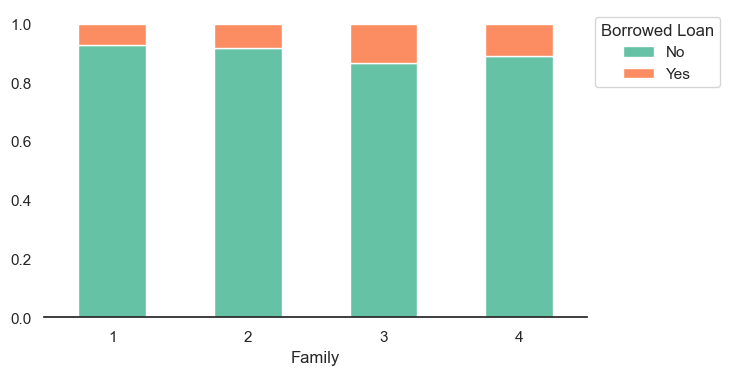

------------------------------------------------------------------------------------------------------------------------


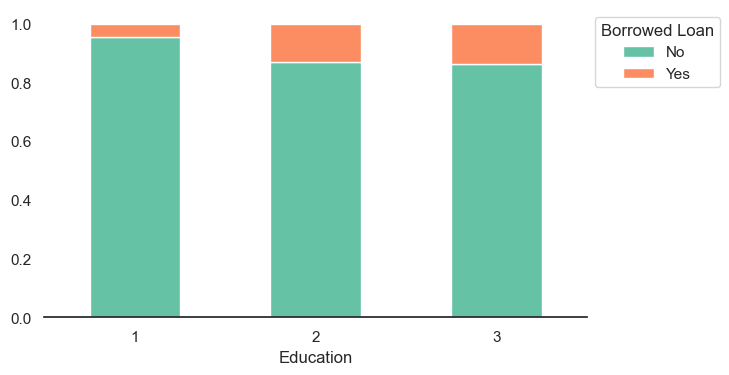

------------------------------------------------------------------------------------------------------------------------


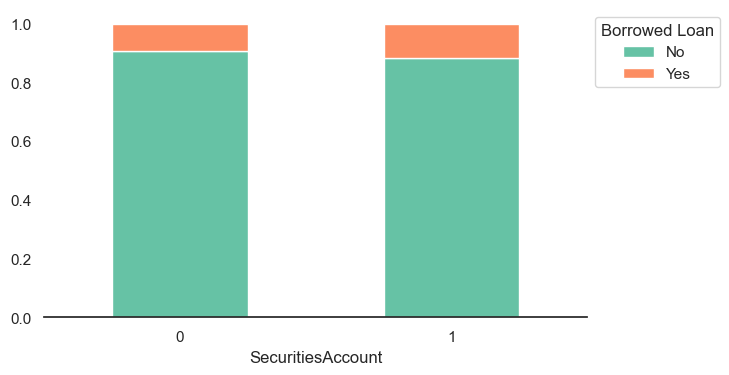

------------------------------------------------------------------------------------------------------------------------


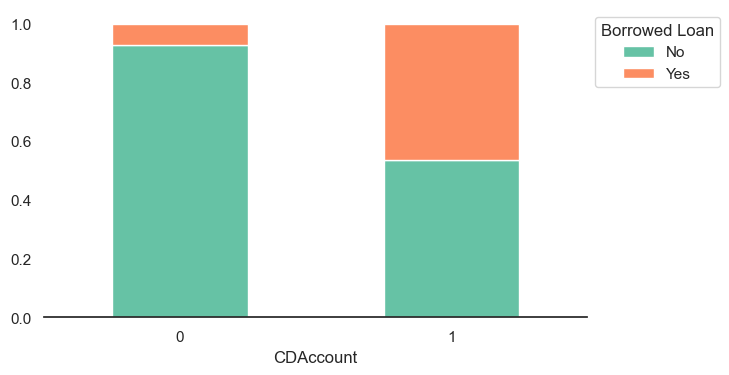

------------------------------------------------------------------------------------------------------------------------


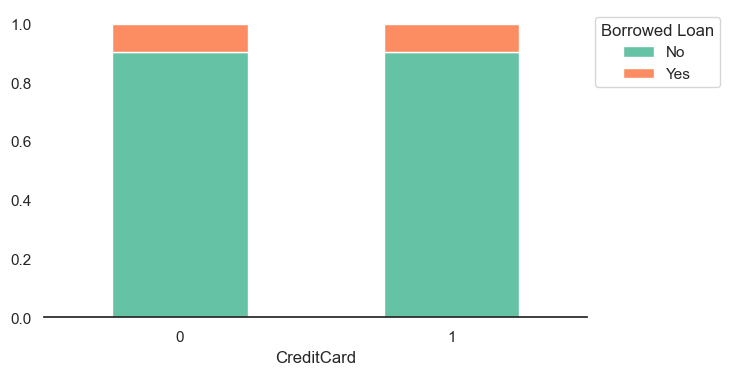

------------------------------------------------------------------------------------------------------------------------


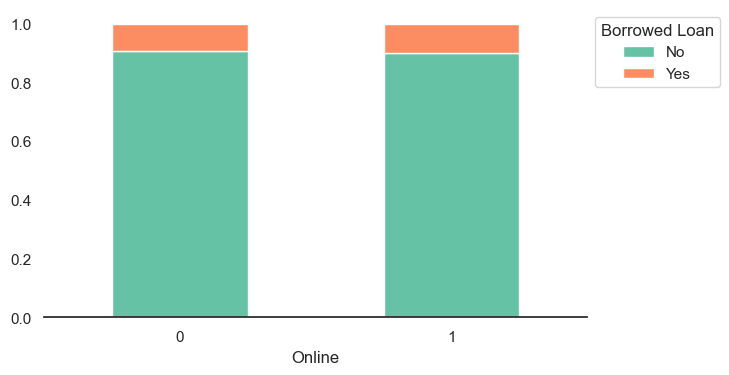

------------------------------------------------------------------------------------------------------------------------


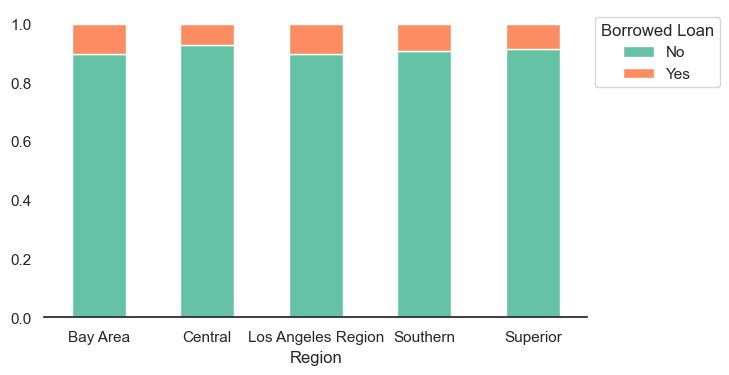

------------------------------------------------------------------------------------------------------------------------


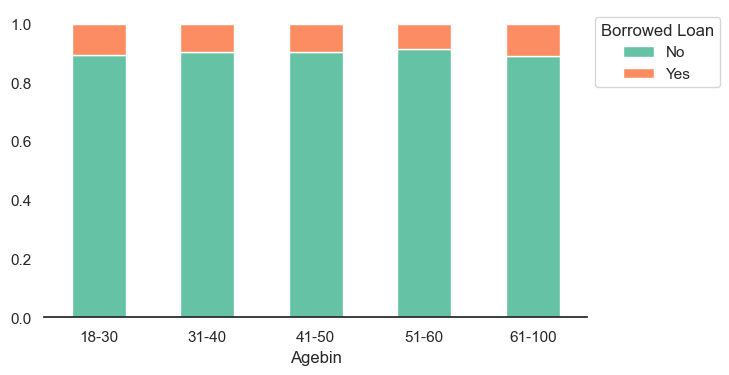

------------------------------------------------------------------------------------------------------------------------


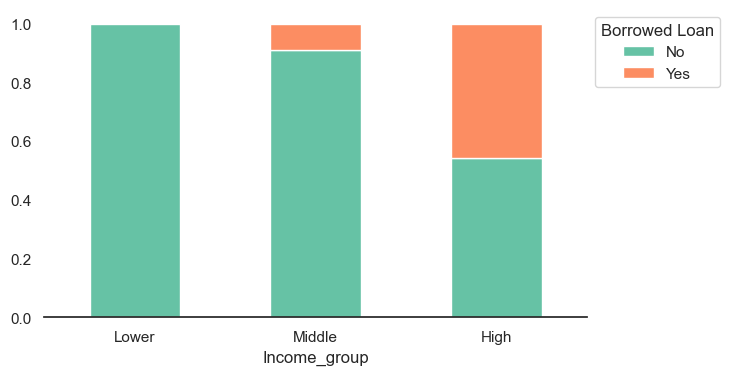

------------------------------------------------------------------------------------------------------------------------


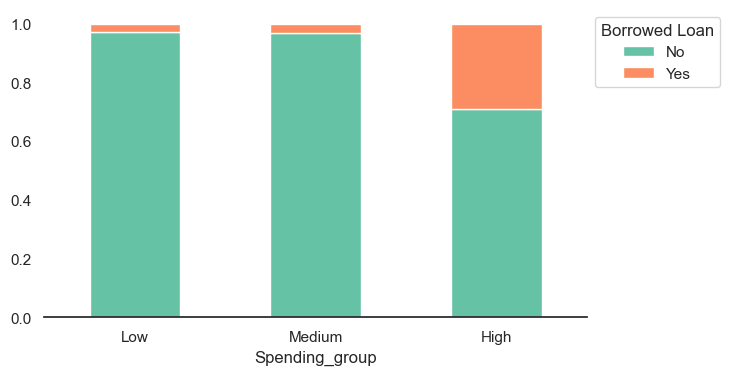

In [56]:
cat_columns=['Family','Education','SecuritiesAccount','CDAccount','CreditCard','Online','Region','Agebin','Income_group','Spending_group']
for i, variable in enumerate(cat_columns):
    stacked_plot(df_loan[variable])

Observations

Number of Customers with Family size of 3 who had borrowed loans from the bank is greatet than other family size
60 of those who had Personal loan with the bank also had Securities_Account.
Customers who had certificate of deposit with the bank had previously borrowed loan
Customers using Online facilities has no impact on personal loan
Majority customers who did have Personal loan with the bank did not used CrediCard from other banks.
Majority customers who had take personal loan
before are from LosAngeles and Bay region.
Ratio of borrowing loan is high in 30 and below and 60 and above customers.
Customer with high average Monthly spending have bought personal loan before
As expected Age and experience are highly correlated and one of them can be dropped. Since experience had negative values dropping experience would be better option

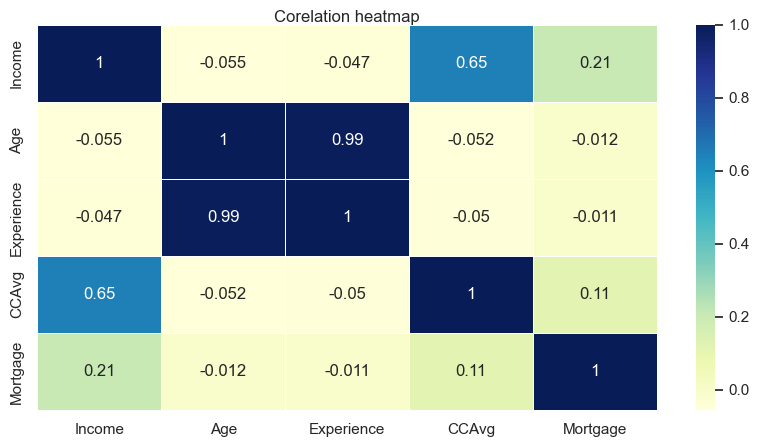

In [57]:
plt.figure(figsize=(10,5))
numerical  = ['Income', 'Age', 'Experience', 'CCAvg', 'Mortgage']

# a better color to see the positive on negative corelation of each variable
heatmap = sns.heatmap(df_loan[numerical].corr(), annot=True, cmap='YlGnBu', linewidth=0.5)
heatmap.set_title('Corelation heatmap', fontdict={'fontsize':12}, pad=2);

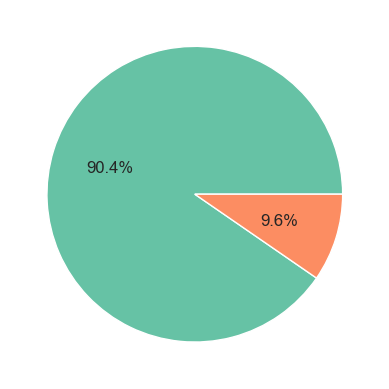

In [58]:
plt.pie(data=df_loan, x=df_loan["PersonalLoan"].value_counts(),autopct='%1.1f%%')
plt.show()

In [59]:
df_Decision = df_loan.copy()

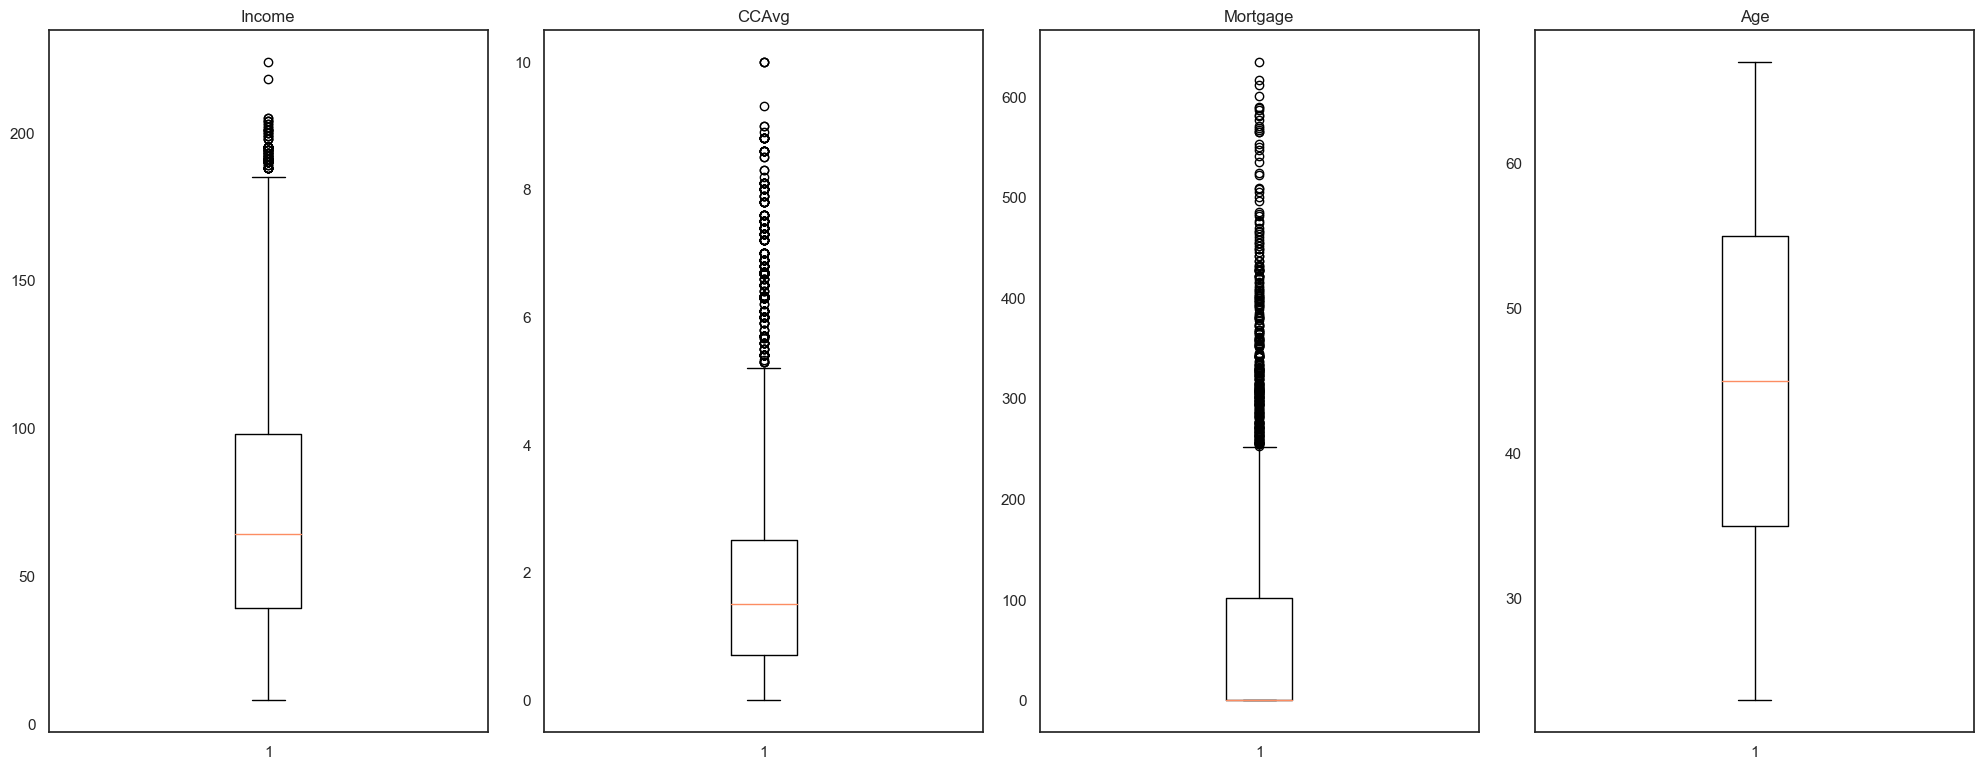

In [60]:
numeric_columns = ['Income', 'CCAvg', 'Mortgage', 'Age']
#outlier detection using boxplot
plt.figure(figsize=(20,30))


for i, variable in enumerate(numeric_columns):
    plt.subplot(4,4,i+1)
    plt.boxplot(df_loan[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

In [61]:
# check income extreme values
df_loan.sort_values(by = ["Income"], ascending = False).head(5)

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
3896   48          24     224   93940      2   6.67         1         0   
4993   45          21     218   91801      2   6.67         1         0   
526    26           2     205   93106      1   6.33         1       271   
2988   46          21     205   95762      2   8.80         1       181   
677    46          21     204   92780      2   2.80         1         0   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
3896            0                 0         1      1          1   
4993            0                 0         0      1          0   
526             0                 0         0      0          1   
2988            0                 1         0      1          0   
677             0                 0         0      1          0   

                   Country Agebin Income_group Spending_group  \
3896       Monterey County  41-50         High           High   
4993    Los Angeles County  41-50         High           High   
526   Santa Barbara County  18-30         High           High   
2988      El Dorado County  41-50         High           High   
677          Orange County  41-50         High           High   

                  Region  
3896            Bay Area  
4993  Los Angeles Region  
526             Southern  
2988             Central  
677             Southern

In [62]:
df_loan.loc[(df_loan['Age'] == 48) & (df_loan['Experience'] == 24)].sort_values(by = ["Income"], ascending = False).head(5)

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
3896   48          24     224   93940      2   6.67         1         0   
196    48          24     165   93407      1   5.00         1         0   
2217   48          24     162   91355      4   3.30         2       446   
4629   48          24     148   91311      2   3.30         1         0   
4167   48          24     144   94025      4   3.50         2         0   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
3896            0                 0         1      1          1   
196             0                 0         0      0          1   
2217            1                 0         1      1          0   
4629            0                 0         1      1          1   
4167            1                 0         0      0          0   

                     Country Agebin Income_group Spending_group  \
3896         Monterey County  41-50         High           High   
196   San Luis Obispo County  41-50         High           High   
2217      Los Angeles County  41-50         High           High   
4629      Los Angeles County  41-50         High           High   
4167        San Mateo County  41-50         High           High   

                  Region  
3896            Bay Area  
196             Southern  
2217  Los Angeles Region  
4629  Los Angeles Region  
4167            Bay Area

In [63]:
# check mortgage extreme values
df_loan.sort_values(by = ["Mortgage"], ascending = False).head(5)

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
2934   37          13     195   91763      2    6.5         1       635   
303    49          25     195   95605      4    3.0         1       617   
4812   29           4     184   92126      4    2.2         3       612   
1783   53          27     192   94720      1    1.7         1       601   
4842   49          23     174   95449      3    4.6         2       590   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
2934            0                 0         0      1          0   
303             1                 0         0      0          0   
4812            1                 0         0      1          0   
1783            0                 0         0      1          0   
4842            1                 0         0      0          0   

                    Country Agebin Income_group Spending_group    Region  
2934  San Bernardino County  31-40         High           High  Southern  
303             Yolo County  41-50         High           High   Central  
4812       San Diego County  18-30         High         Medium  Southern  
1783         Alameda County  51-60         High         Medium  Bay Area  
4842       Mendocino County  41-50         High           High  Superior

In [64]:
# check CCAvg extreme values
df_loan.sort_values(by = ["CCAvg"], ascending = False).head(5)

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
2101   35           5     203   95032      1   10.0         3         0   
2337   43          16     201   95054      1   10.0         2         0   
787    45          15     202   91380      3   10.0         3         0   
3943   61          36     188   91360      1    9.3         2         0   
1339   52          25     180   94545      2    9.0         2       297   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
2101            1                 0         0      0          0   
2337            1                 0         0      0          1   
787             1                 0         0      0          0   
3943            1                 0         0      0          0   
1339            1                 0         0      1          0   

                 Country  Agebin Income_group Spending_group  \
2101  Santa Clara County   31-40         High           High   
2337  Santa Clara County   41-50         High           High   
787   Los Angeles County   41-50         High           High   
3943      Ventura County  61-100         High           High   
1339      Alameda County   51-60         High           High   

                  Region  
2101            Bay Area  
2337            Bay Area  
787   Los Angeles Region  
3943            Southern  
1339            Bay Area

In [65]:
#drop columns which we dont need for medelling

df_loan.drop(columns=["Agebin", "ZIPCode", "Country", "Experience", "Income_group", "Spending_group"], inplace=True)

In [66]:
X = df_loan.drop(['PersonalLoan'],axis=1)

In [67]:
Y= df_loan['PersonalLoan']

In [68]:
oneHotCols = ['Region', 'Education']
X = pd.get_dummies(X, columns=oneHotCols, drop_first=True)

In [69]:
X

Age  Income Family  CCAvg  Mortgage SecuritiesAccount CDAccount Online  \
0      25      49      4    1.6         0                 1         0      0   
1      45      34      3    1.5         0                 1         0      0   
2      39      11      1    1.0         0                 0         0      0   
3      35     100      1    2.7         0                 0         0      0   
4      35      45      4    1.0         0                 0         0      0   
...   ...     ...    ...    ...       ...               ...       ...    ...   
4995   29      40      1    1.9         0                 0         0      1   
4996   30      15      4    0.4        85                 0         0      1   
4997   63      24      2    0.3         0                 0         0      0   
4998   65      49      3    0.5         0                 0         0      1   
4999   28      83      3    0.8         0                 0         0      1   

     CreditCard  Region_Central  Region_Los Angeles Region  Region_Southern  \
0             0               0                          1                0   
1             0               0                          1                0   
2             0               0                          0                0   
3             0               0                          0                0   
4             1               0                          1                0   
...         ...             ...                        ...              ...   
4995          0               0                          0                1   
4996          0               0                          0                1   
4997          0               0                          0                1   
4998          0               0                          1                0   
4999          1               0                          0                1   

      Region_Superior  Education_2  Education_3  
0                   0            0            0  
1                   0            0            0  
2                   0            0            0  
3                   0            1            0  
4                   0            1            0  
...               ...          ...          ...  
4995                0            0            1  
4996                0            0            0  
4997                0            0            1  
4998                0            1            0  
4999                0            0            0  

[4999 rows x 15 columns]

In [70]:
# splitting data in train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [71]:
1000(800 no loans, 200 yes loans)

700 train (140 rows - yes loans) 
300 test (60 rows - yes loans )

SyntaxError: invalid syntax. Perhaps you forgot a comma? (816083173.py, line 1)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaler = scaler.fit(x_train)
x_train_scaled = X_scaler.transform(x_train)
x_test_scaled = X_scaler.transform(x_test)

x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [73]:
x_train_scaled_df.index = np.arange(len(x_train_scaled_df))
x_test_scaled_df.index = np.arange(len(x_test_scaled_df))

y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))


Model building Logistic Regression

Model evaluation criterion

Model can make wrong predictions as:
Predicting a person will buy a loan but he actually doesn't.(Loss of Resource)
Predicting a person will not buy a loan but he actually does.(Loss of Opportunity)

Which case is more important?
The whole purpose of the campagin is to bring in more customers. 2nd case is more important to us .A potential customer is missed by the sales/marketing team .It's lost of opportunity.So we want to minimize this loss.

How to reduce losses? i.e need to reduce False Negatives ?
In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.Banks wants Recall to be maximized, greater the recall lesser the chances of false negatives.

We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.

Therefore, Recall should be maximized, the greater the Recall higher the chances of identifying both the classes correctly.

In [74]:
from sklearn.metrics import roc_curve

In [75]:
def make_confusion_matrix(y_actual, y_predict, title):
    fig, ax = plt.subplots(1,1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No","Yes"])
    disp.plot(cmap='Greens', colorbar=True, ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both', length=0)
    #plt.grid(b=None, axis='both', which='both', visible=False)
    plt.show()

In [76]:
def get_metrics_score(model, x_train_df, x_test_df, y_train_pass, y_test_pass, statsklearn, threshold=0.5, flag=True, roc=False):

    # defining an empty list to store train and test results
    
    score_list=[]
    
    if statsklearn == 0:
        pred_train = model.predict(x_train_df)
        pred_test = model.predict(x_test_df)
        
    else:
        pred_train = (model.predict(x_train_df)>threshold)
        pred_test = (model.predict(x_test_df)>threshold)
        
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(y_train_pass, pred_train)
    test_acc = accuracy_score(y_test_pass, pred_test)
    
    train_recall = recall_score(y_train_pass, pred_train)
    test_recall = recall_score(y_test_pass, pred_test)
    
    train_precision = precision_score(y_train_pass, pred_train)
    test_precision = precision_score(y_test_pass, pred_test)
    
    train_f1 = f1_score(y_train_pass, pred_train)
    test_f1 = f1_score(y_test_pass, pred_test)
    
    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1))
    
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(accuracy_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(precision_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(y_test_pass,pred_test),3))
    
        make_confusion_matrix(y_train_pass, pred_train, "Confusion matrix for train")
        make_confusion_matrix(y_test_pass, pred_test, "Confusion matrix for test")
        
    if roc == True:
            
        print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
              round(roc_auc_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
              round(roc_auc_score(y_test_pass,pred_test),3))
    
    return score_list # returning the list with train and test scores
        

In [77]:
## defining empty list to add train and test results

acc_train = []
acc_test = []
recall_train  = []
recall_test  = []
precision_train  = []
precision_test  = []
f1_train = []
f1_test = []

def add_score_model1(score):
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])
    



 MODEL PERFORMANCE
 Accuracy   : Train: 0.658  Test:  0.65
 Recall     : Train: 0.979  Test: 0.986
 Precision  : Train: 0.217  Test:  0.214
 F1         : Train: 0.355  Test: 0.351


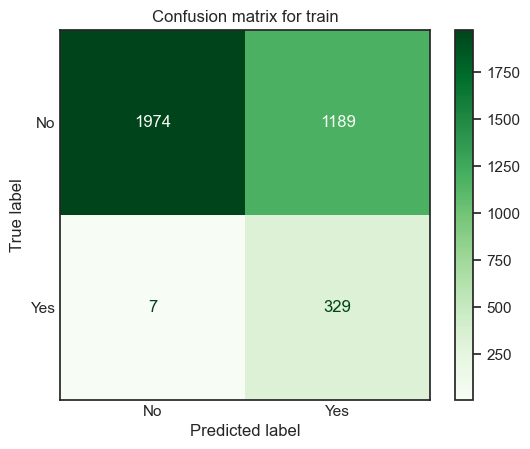

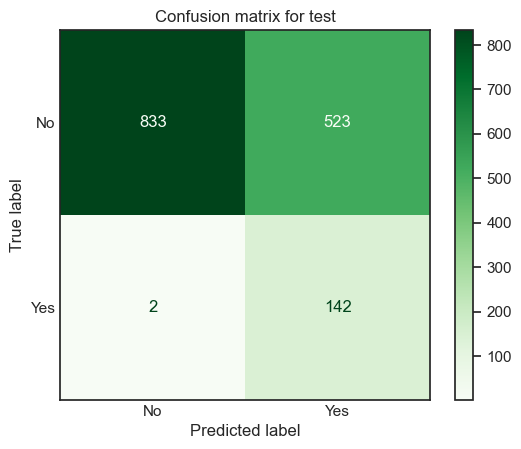

In [78]:
lr = LogisticRegression(solver='newton-cg', random_state=1, fit_intercept = False, class_weight={0:0.15, 1:0.85})
model = lr.fit(x_train_scaled_df, y_train)

statmodel=0  #1 for sklearn and 0 for statmodel

# model performance
scores_Sklearn = get_metrics_score(model, x_train_scaled_df, x_test_scaled_df, y_train, y_test, statmodel)

In [79]:
add_score_model1(scores_Sklearn)

Optimization terminated successfully.
         Current function value: 0.113898
         Iterations 9
 MODEL PERFORMANCE
 Accuracy   : Train: 0.962  Test:  0.953
 Recall     : Train: 0.688  Test: 0.653
 Precision  : Train: 0.888  Test:  0.817
 F1         : Train: 0.775  Test: 0.726


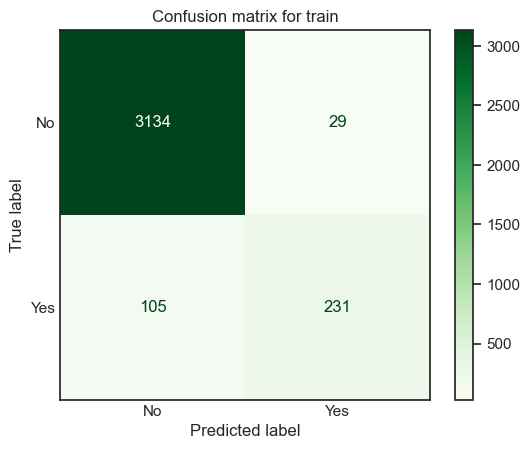

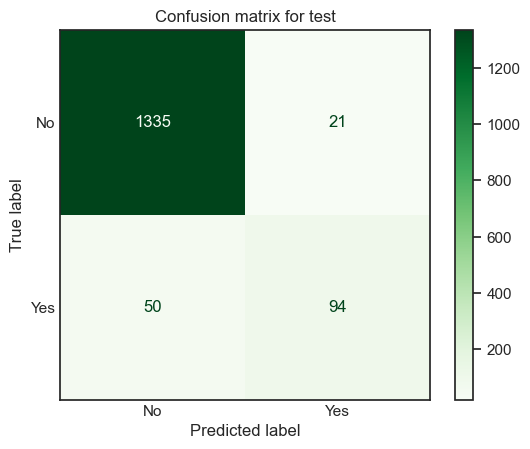

In [80]:
# add constant for logistic regression
x_train_stat = sm.add_constant(x_train_scaled_df)
x_test_stat = sm.add_constant(x_test_scaled_df)
statsmodel=1
logit = sm.Logit( y_train, x_train_stat.astype(float) )
lg = logit.fit(warn_convergence=False)

scores_statmodel = get_metrics_score(lg, x_train_stat, x_test_stat, y_train, y_test, statmodel)
lg.summary()
add_score_model1(scores_statmodel)

In [81]:
x_train_num = x_train_stat.astype(float).copy()

In [82]:
vif_series1  =pd.Series([variance_inflation_factor(x_train_num.values, i )
                        for i in range(x_train_num.shape[1] )], index=x_train_num.columns, dtype=float)
print('Series before feature selection :\n\n{}\n'.format(vif_series1))

Series before feature selection :

const                        1.000000
Age                          1.010117
Income                       1.907857
Family                       1.050164
CCAvg                        1.743324
Mortgage                     1.064169
SecuritiesAccount            1.155382
CDAccount                    1.358389
Online                       1.046892
CreditCard                   1.114807
Region_Central               1.117654
Region_Los Angeles Region    1.220772
Region_Southern              1.241303
Region_Superior              1.027911
Education_2                  1.287214
Education_3                  1.258929
dtype: float64



In [83]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           15
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.6399
Time:                        09:38:58   Log-Likelihood:                -398.53
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                5.492e-293
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.2604      0.236    -22.276      0.000      -5.723      -4.798
Age                           0.1547      0.096      1.618      0.106      -0.033       0.342
Income                        3.0106      0.177     17.055      0.000       2.665       3.357
Family                        0.7829      0.108      7.278      0.000       0.572       0.994
CCAvg                         0.2176      0.094      2.310      0.021       0.033       0.402
Mortgage                      0.0874      0.073      1.206      0.228      -0.055       0.230
SecuritiesAccount            -0.2303      0.112     -2.056      0.040      -0.450      -0.011
CDAccount                     0.8431      0.100      8.459      0.000       0.648       1.038
Online                       -0.3423      0.099     -3.457      0.001      -0.536      -0.148
CreditCard                   -0.3662      0.116     -3.153      0.002      -0.594      -0.139
Region_Central               -0.1968      0.111     -1.781      0.075      -0.413       0.020
Region_Los Angeles Region    -0.0451      0.102     -0.444      0.657      -0.244       0.154
Region_Southern              -0.0149      0.104     -0.143      0.886      -0.219       0.189
Region_Superior              -0.3143      0.216     -1.456      0.145      -0.737       0.109
Education_2                   1.8569      0.150     12.375      0.000       1.563       2.151
Education_3                   1.9912      0.152     13.101      0.000       1.693       2.289
=============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [84]:
x_train1 = x_train_stat.drop(['Region_Central', 'Region_Los Angeles Region', 'Region_Southern', 'Region_Superior'], axis = 1)
x_test1= x_test_stat.drop(['Region_Central', 'Region_Los Angeles Region', 'Region_Southern', 'Region_Superior'], axis = 1)

logit1 = sm.Logit(y_train, x_train1.astype(float))
lg1 = logit1.fit(warn_convergence=False)
lg1.summary()

Optimization terminated successfully.
         Current function value: 0.114762
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           11
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.6371
Time:                        09:38:59   Log-Likelihood:                -401.55
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                7.885e-296
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1980      0.230    -22.607      0.000      -5.649      -4.747
Age                   0.1507      0.095      1.585      0.113      -0.036       0.337
Income                2.9923      0.174     17.158      0.000       2.650       3.334
Family                0.7735      0.107      7.240      0.000       0.564       0.983
CCAvg                 0.2112      0.093      2.266      0.023       0.028       0.394
Mortgage              0.0806      0.072      1.116      0.264      -0.061       0.222
SecuritiesAccount    -0.2293      0.113     -2.036      0.042      -0.450      -0.009
CDAccount             0.8396      0.099      8.469      0.000       0.645       1.034
Online               -0.3457      0.099     -3.505      0.000      -0.539      -0.152
CreditCard           -0.3831      0.116     -3.298      0.001      -0.611      -0.155
Education_2           1.8450      0.149     12.388      0.000       1.553       2.137
Education_3           1.9776      0.151     13.123      0.000       1.682       2.273
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [85]:
# delete age and morthgage and then check accuracy

In [86]:
x_train1 = x_train_stat.drop(['Region_Central', 'Region_Los Angeles Region', 'Region_Southern', 'Region_Superior'], axis = 1)
x_test1= x_test_stat.drop(['Region_Central', 'Region_Los Angeles Region', 'Region_Southern', 'Region_Superior'], axis = 1)


In [87]:
x_train2 = x_train1.drop(['Age','Mortgage'], axis = 1)
x_test2 = x_test1.drop(['Age','Mortgage'], axis = 1)

Optimization terminated successfully.
         Current function value: 0.115294
         Iterations 9
 MODEL PERFORMANCE
 Accuracy   : Train: 0.959  Test:  0.956
 Recall     : Train: 0.682  Test: 0.674
 Precision  : Train: 0.864  Test:  0.836
 F1         : Train: 0.762  Test: 0.746


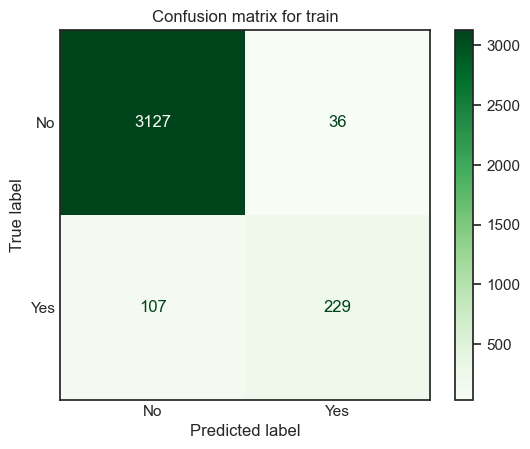

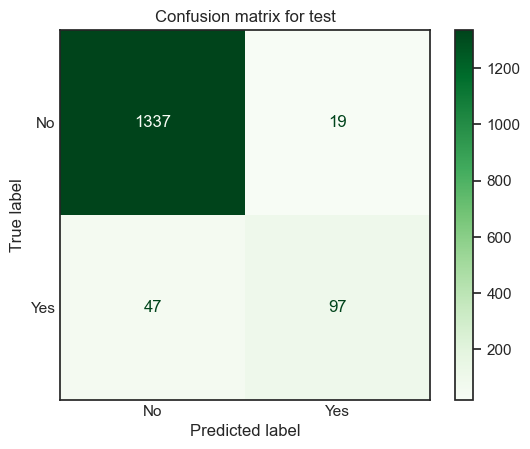

In [88]:
# x_train_stat = sm.add_constant(x_train_scaled_df)
# x_test_stat = sm.add_constant(x_test_scaled_df)
statmodel=1
logit = sm.Logit( y_train, x_train2.astype(float) )
lg3 = logit.fit(warn_convergence=False)

scores_statmodel2 = get_metrics_score(lg3, x_train2, x_test2, y_train, y_test, statsmodel)
lg3.summary()
add_score_model1(scores_statmodel2)

In [141]:
# area under the curve
# to check what %error is explainable
from sklearn.metrics import roc_curve, roc_auc_score

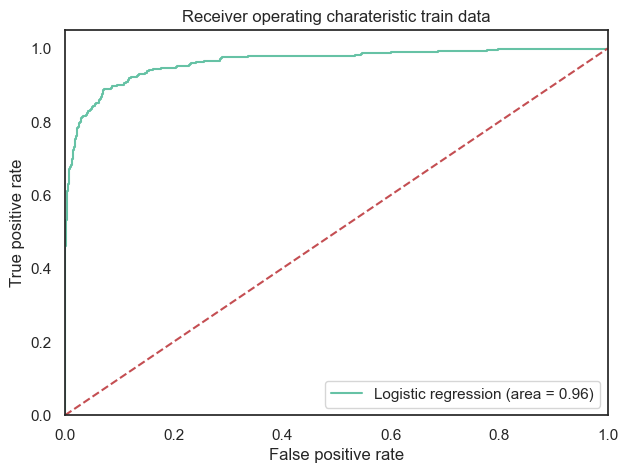

In [90]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(x_train2))
fpr, tpr, threshold = roc_curve(y_train, lg3.predict(x_train2))

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating charateristic train data')
plt.legend(loc="lower right")
plt.show()

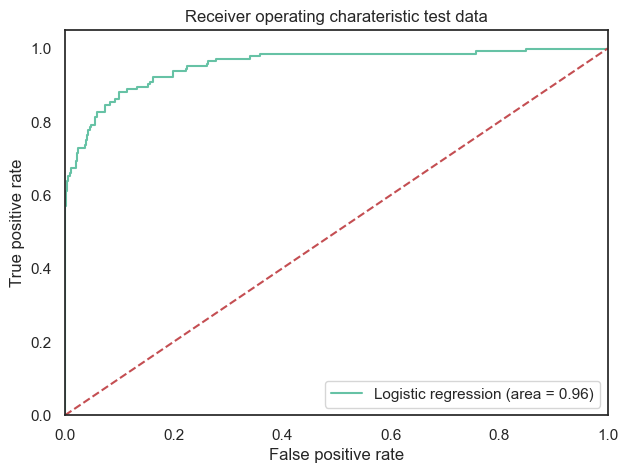

In [91]:
logit_roc_auc_test = roc_auc_score(y_test, lg3.predict(x_test2))
fpr, tpr, threshold = roc_curve(y_test, lg3.predict(x_test2))

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating charateristic test data')
plt.legend(loc="lower right")
plt.show()

In [92]:
lg3.params

const               -5.173494
Income               3.002579
Family               0.769091
CCAvg                0.179221
SecuritiesAccount   -0.233837
CDAccount            0.844411
Online              -0.335425
CreditCard          -0.385416
Education_2          1.832853
Education_3          1.951306
dtype: float64

Logistic Regression model is giving a generalized performance on training and test set.
ROC-AUC score of 0.96 on training and test set is quite good.

Coefficient interpretations
Coefficient of Income, Education, Family,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan
Coefficient of Securities account,online ,Credit card are negative, increase in these will lead to decrease in chances of a person borrowing a loan.

Converting coefficients to odds
The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.

Therefore, odds = exp(b)
Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)
The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [93]:
lgcoef = pd.DataFrame(lg3.params, columns=['coef'])
lgcoef

coef
const             -5.173494
Income             3.002579
Family             0.769091
CCAvg              0.179221
SecuritiesAccount -0.233837
CDAccount          0.844411
Online            -0.335425
CreditCard        -0.385416
Education_2        1.832853
Education_3        1.951306

In [94]:
lgcoef.loc[:, 'Odds Ratio'] = np.exp(lgcoef.coef)
lgcoef

coef  Odds Ratio
const             -5.173494    0.005665
Income             3.002579   20.137398
Family             0.769091    2.157804
CCAvg              0.179221    1.196285
SecuritiesAccount -0.233837    0.791491
CDAccount          0.844411    2.326607
Online            -0.335425    0.715034
CreditCard        -0.385416    0.680168
Education_2        1.832853    6.251697
Education_3        1.951306    7.037870

In [95]:
lgcoef['Prob'] = lgcoef['Odds Ratio']/(1+lgcoef['Odds Ratio'])

lgcoef['Perc change of odds'] = (np.exp(lg3.params)-1)*100

lgcoef['pval'] = lg3.pvalues

pd.options.display.float_format = '{:.2f}'.format

lgcoef = lgcoef.sort_values(by = "Odds Ratio", ascending=False)
lgcoef

coef  Odds Ratio  Prob  Perc change of odds  pval
Income             3.00       20.14  0.95              1913.74  0.00
Education_3        1.95        7.04  0.88               603.79  0.00
Education_2        1.83        6.25  0.86               525.17  0.00
CDAccount          0.84        2.33  0.70               132.66  0.00
Family             0.77        2.16  0.68               115.78  0.00
CCAvg              0.18        1.20  0.54                19.63  0.05
SecuritiesAccount -0.23        0.79  0.44               -20.85  0.04
Online            -0.34        0.72  0.42               -28.50  0.00
CreditCard        -0.39        0.68  0.40               -31.98  0.00
const             -5.17        0.01  0.01               -99.43  0.00

Income: Holding all other features constant a 1 unit change in Income will increase the odds of a customer taking a personal loan by 20 times or a 95% chance of a customer taking personal loan.

Family: Holding all other features constant a 1 unit change in Family will increase the odds of a customer taking a personal loan by 2.16 times increase in the odds of a customer taking personal loan.
    CCAvg: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a customer taking a personal loan by 1.22 times or a 22.16% increase in the odds of a customer taking personal loan.

Education Advance has 7 times higher chances of taking a personal loan than undergraduate Interpretation for other attributes can be done similarly.

Most overall significant varaibles are Income,Education, CD account ,Family and CCAvg

In [96]:
# optimal threshold as per AUC ROC curve
# the optimal cutoff would be where tpr is high and fpr is low
# fpr, tpr, threshold = metrics.roc_curve(y_test, lg2.predict(x_test2))

optimal_idx = np.argmax(tpr - fpr)
optmal_threshold_auc_roc = threshold[optimal_idx]
print(optmal_threshold_auc_roc)

0.09150126568446633


 MODEL PERFORMANCE
 Accuracy   : Train: 0.899  Test:  0.897
 Recall     : Train: 0.902  Test: 0.875
 Precision  : Train: 0.487  Test:  0.481
 F1         : Train: 0.633  Test: 0.621


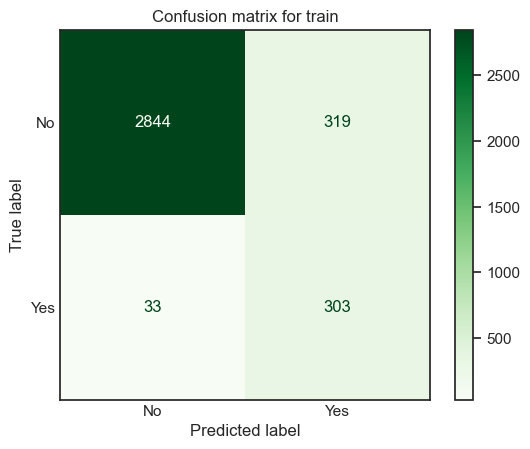

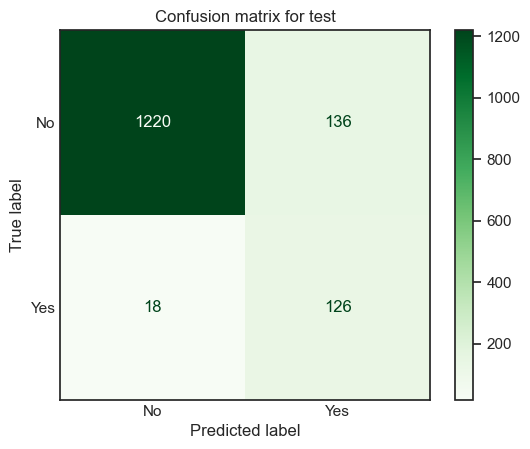

 ROC-AUC Score  :Train::  0.9  Test::  0.887


In [97]:
scores_statmodel3 = get_metrics_score(lg3, x_train2, x_test2, y_train, y_test, statmodel, threshold =optmal_threshold_auc_roc, roc=True)
add_score_model1(scores_statmodel3)

In [98]:
from sklearn.metrics import precision_recall_curve

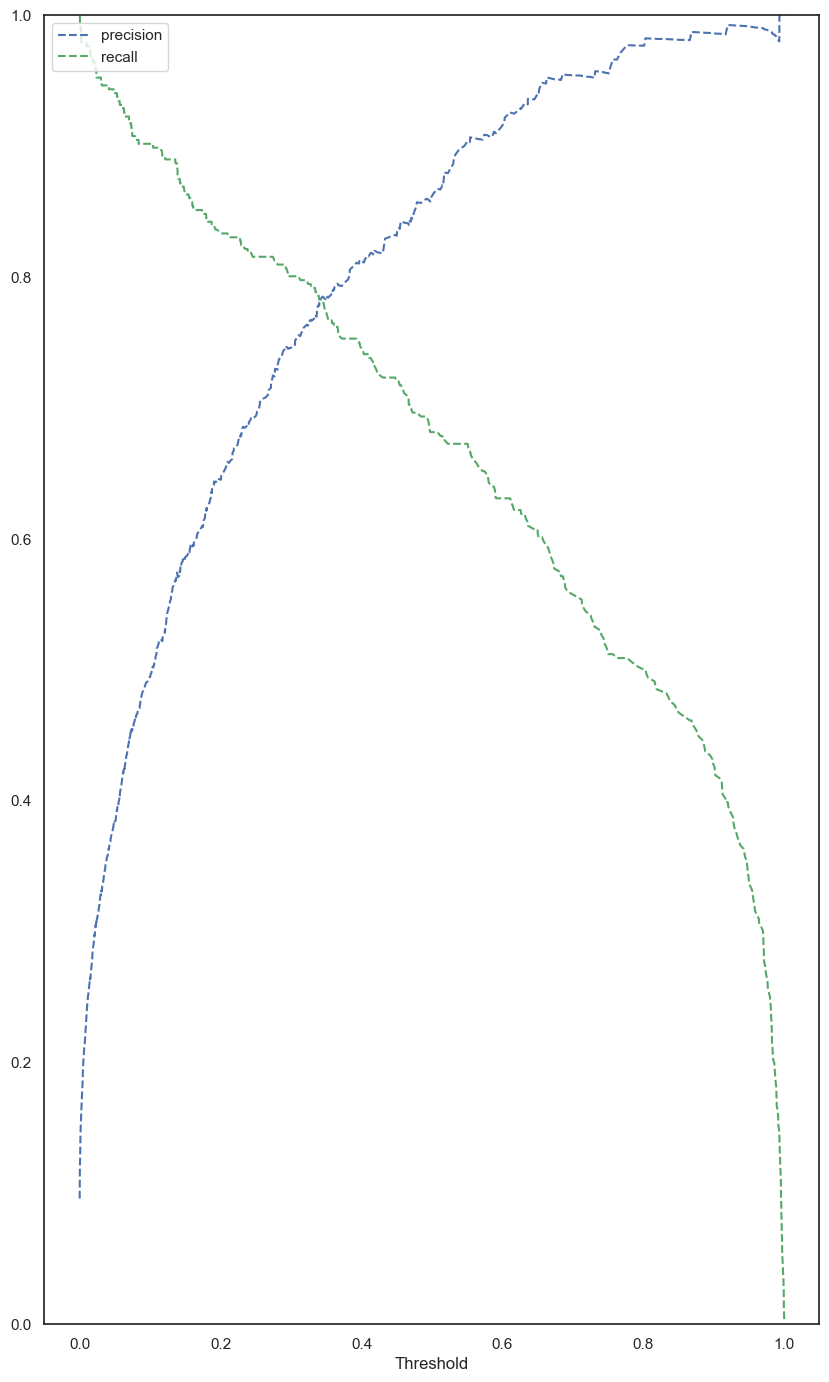

In [99]:
y_scores = lg3.predict(x_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores, )


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,17))
plot_prec_recall_vs_tresh( prec, rec, tre)
plt.show()

 MODEL PERFORMANCE
 Accuracy   : Train: 0.955  Test:  0.945
 Recall     : Train: 0.801  Test: 0.729
 Precision  : Train: 0.747  Test:  0.705
 F1         : Train: 0.773  Test: 0.717


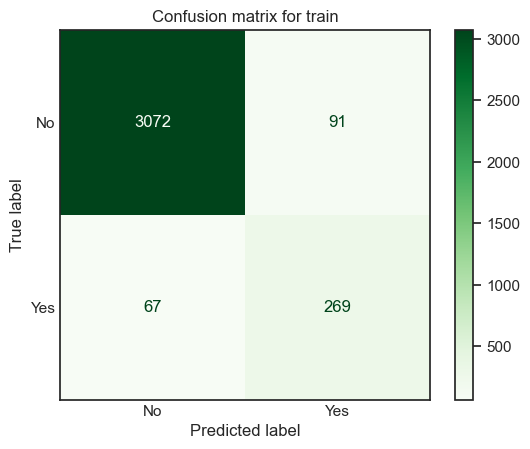

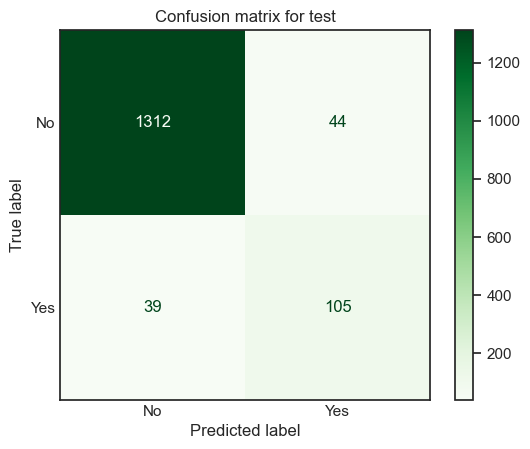

 ROC-AUC Score  :Train::  0.886  Test::  0.848


In [100]:
optimal_threshold_curve = 0.3

scores_opt_curve = get_metrics_score(lg3, x_train2, x_test2, y_train, y_test, statmodel, threshold=optimal_threshold_curve, roc=True)
add_score_model1(scores_opt_curve)

In [101]:
# Using sequnetial feature selection

#!pip install mlxtend

In [102]:
x_train_seq = x_train_stat
x_test_seq = x_test_stat

In [103]:
import mlxtend

In [104]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
x_train_seq.shape

(3499, 16)

In [105]:
statmodel = 0
clf = LogisticRegression(solver='newton-cg', random_state=1, fit_intercept=False)
sfs1 = sfs(clf, k_features = 16, forward=True,
          floating=False, scoring='recall',
          verbose=2, cv=5)

sfs1 = sfs1.fit(x_train_seq, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.7s finished

[2024-02-24 09:39:16] Features: 1/16 -- score: 0.9941176470588236[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.0s finished

[2024-02-24 09:39:17] Features: 2/16 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.1s finished

[2024-02-24 09:39:18] Features: 3/16 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [106]:
statmodel  = 0

clf = LogisticRegression(solver='newton-cg', random_state=1, fit_intercept=False)
sfs1 = sfs(clf, k_features = 11, forward=True,
          floating=False, scoring='recall',
          verbose=2, cv=5)

sfs1 = sfs1.fit(x_train_seq, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.7s finished

[2024-02-24 09:39:28] Features: 1/11 -- score: 0.9941176470588236[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.0s finished

[2024-02-24 09:39:29] Features: 2/11 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished

[2024-02-24 09:39:30] Features: 3/11 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [107]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14]


In [108]:
x_train_seq.columns[feat_cols]

Index(['Age', 'Income', 'CCAvg', 'Mortgage', 'SecuritiesAccount', 'Online',
       'CreditCard', 'Region_Central', 'Region_Los Angeles Region',
       'Region_Superior', 'Education_2'],
      dtype='object')

In [109]:
x_train_final = x_train_seq[x_train_seq.columns[feat_cols]]
x_test_final = x_test_seq[x_train_final.columns]

In [110]:
lr = LogisticRegression(solver='newton-cg', random_state=1, fit_intercept=False)
model = lr.fit(x_train_final, y_train)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.677  Test:  0.686
 Recall     : Train: 0.997  Test: 0.972
 Precision  : Train: 0.229  Test:  0.231
 F1         : Train: 0.372  Test: 0.373


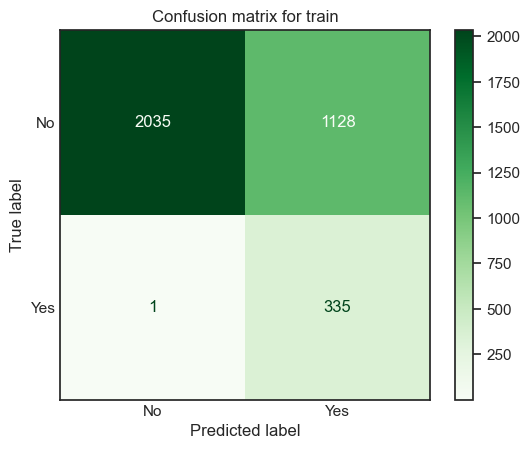

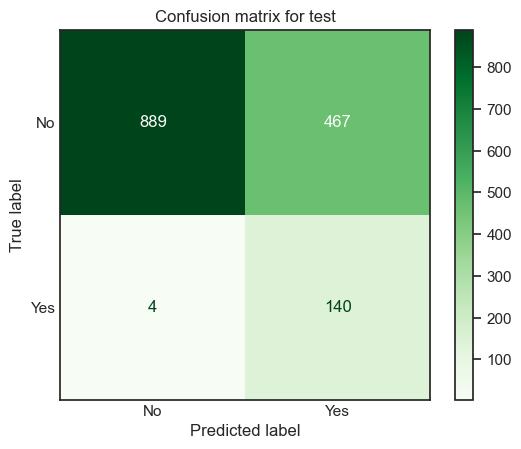

In [111]:
statmodel = 0

scores_sfs = get_metrics_score(model, x_train_final, x_test_final, y_train, y_test, statmodel)
add_score_model1(scores_sfs)

In [112]:
comparison_frame = pd.DataFrame.from_dict({'Model':['Logistic Regression Model- Sklearn', 
                                          'Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0.092',
                                          'Logistic Regression - Optimal threshold = 0.3',
                                          'Logistic Regression - Sequential feature selection'
                                          ],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                }, orient='index' )
                                    
    
                                       

comparison_frame = comparison_frame.transpose()

In [113]:
comparison_frame

Model Train_Accuracy  \
0                 Logistic Regression Model- Sklearn           0.66   
1            Logistic Regression Model - Statsmodels           0.96   
2    Logistic Regression - Optimal threshold = 0.092           0.96   
3      Logistic Regression - Optimal threshold = 0.3           0.90   
4  Logistic Regression - Sequential feature selec...           0.95   
5                                                NaN           0.68   

  Test_Accuracy Train Recall Test Recall Train Precision Test Precision  \
0          0.65         0.98        0.99            0.22           0.21   
1          0.95         0.69        0.65            0.89           0.82   
2          0.96         0.68        0.67            0.86           0.84   
3          0.90         0.90        0.88            0.49           0.48   
4          0.94         0.80        0.73            0.75           0.70   
5          0.69         1.00        0.97            0.23           0.23   

  Train F1 Test F1  
0     0.35    0.35  
1     0.78    0.73  
2     0.76    0.75  
3     0.63    0.62  
4     0.77    0.72  
5     0.37    0.37

# Decision Tree

In [114]:
df_Decision

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
0      25           1      49   91107      4   1.60         1         0   
1      45          19      34   90089      3   1.50         1         0   
2      39          15      11   94720      1   1.00         1         0   
3      35           9     100   94112      1   2.70         2         0   
4      35           8      45   91330      4   1.00         2         0   
...   ...         ...     ...     ...    ...    ...       ...       ...   
4995   29           3      40   92697      1   1.90         3         0   
4996   30           4      15   92037      4   0.40         1        85   
4997   63          39      24   93023      2   0.30         3         0   
4998   65          40      49   90034      3   0.50         2         0   
4999   28           4      83   92612      3   0.80         1         0   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0               0                 1         0      0          0   
1               0                 1         0      0          0   
2               0                 0         0      0          0   
3               0                 0         0      0          0   
4               0                 0         0      0          1   
...           ...               ...       ...    ...        ...   
4995            0                 0         0      1          0   
4996            0                 0         0      1          0   
4997            0                 0         0      0          0   
4998            0                 0         0      1          0   
4999            0                 0         0      1          1   

                   Country  Agebin Income_group Spending_group  \
0       Los Angeles County   18-30        Lower         Medium   
1       Los Angeles County   41-50        Lower         Medium   
2           Alameda County   31-40        Lower         Medium   
3     San Francisco County   31-40       Middle           High   
4       Los Angeles County   31-40        Lower         Medium   
...                    ...     ...          ...            ...   
4995         Orange County   18-30        Lower         Medium   
4996      San Diego County   18-30        Lower            Low   
4997        Ventura County  61-100        Lower            Low   
4998    Los Angeles County  61-100        Lower            Low   
4999         Orange County   18-30       Middle         Medium   

                  Region  
0     Los Angeles Region  
1     Los Angeles Region  
2               Bay Area  
3               Bay Area  
4     Los Angeles Region  
...                  ...  
4995            Southern  
4996            Southern  
4997            Southern  
4998  Los Angeles Region  
4999            Southern  

[4999 rows x 18 columns]

In [115]:
df_Decision.drop(columns=["Agebin", "ZIPCode", "Country", "Experience", "Income_group", "Spending_group"], inplace=True)

In [116]:
x_dt = df_Decision.drop('PersonalLoan', axis=1)
y_dt = df_Decision['PersonalLoan']

In [117]:
oneHotCols = x_dt.select_dtypes(exclude='number').columns.to_list()
x_dt = pd.get_dummies(x_dt, columns=oneHotCols, drop_first=True)
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_dt, y_dt, test_size=0.3, random_state=1, stratify=y_dt)

In [118]:
oneHotCols

['Family',
 'Education',
 'SecuritiesAccount',
 'CDAccount',
 'Online',
 'CreditCard',
 'Region']

In [119]:
# Function to calculate recall score

def get_recall_score(model):
    y_train_predict = model.predict(x_train_dt)
    y_test_predict = model.predict(x_test_dt)
    
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m",
         model.score(x_train_dt, y_train_dt),
         "\x1b[0;30;47m \033[1mTest : \033[0m", model.score(x_test_dt, y_test_dt))
    
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m",
         metrics.recall_score(y_train_dt, y_train_predict),
         "\x1b[0;30;47m \033[1mTest : \033[0m", metrics.recall_score(y_test_dt, y_test_predict))
    
    make_confusion_matrix(y_train_dt, y_train_predict, "Confusion metrics on Train data")
    make_confusion_matrix(y_test_dt, y_test_predict, "Confusion metrics on Test data")

 Accuracy : Train : 1.0  Test :  0.984
 Accuracy : Train : 1.0  Test :  0.9027777777777778


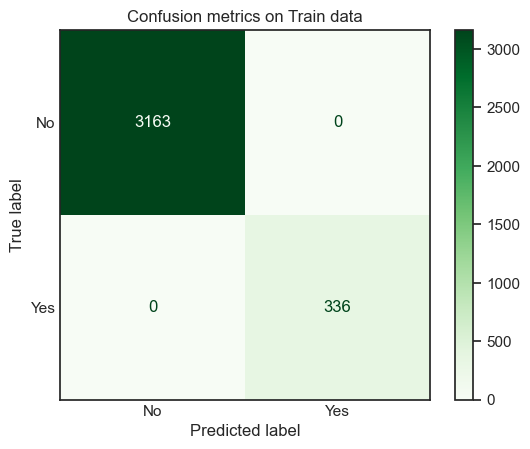

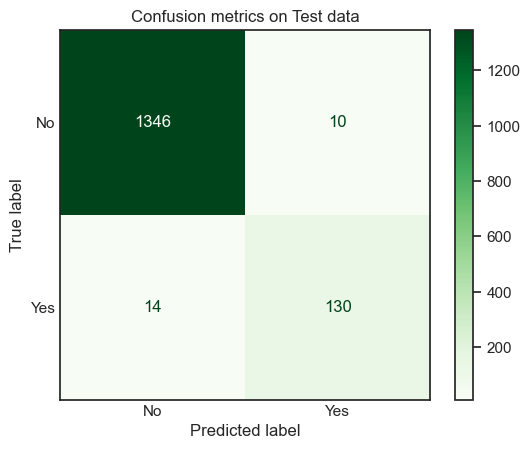

In [142]:
from sklearn import metrics
model = DecisionTreeClassifier(criterion = 'gini', class_weight = {0:0.15, 1:0.85}, random_state=1)
model.fit(x_train_dt, y_train_dt)
get_recall_score(model)

In [143]:
column_names = list(x_dt.columns)
feature_names = column_names


In [144]:
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'SecuritiesAccount_1', 'CDAccount_1', 'Online_1', 'CreditCard_1', 'Region_Central', 'Region_Los Angeles Region', 'Region_Southern', 'Region_Superior']


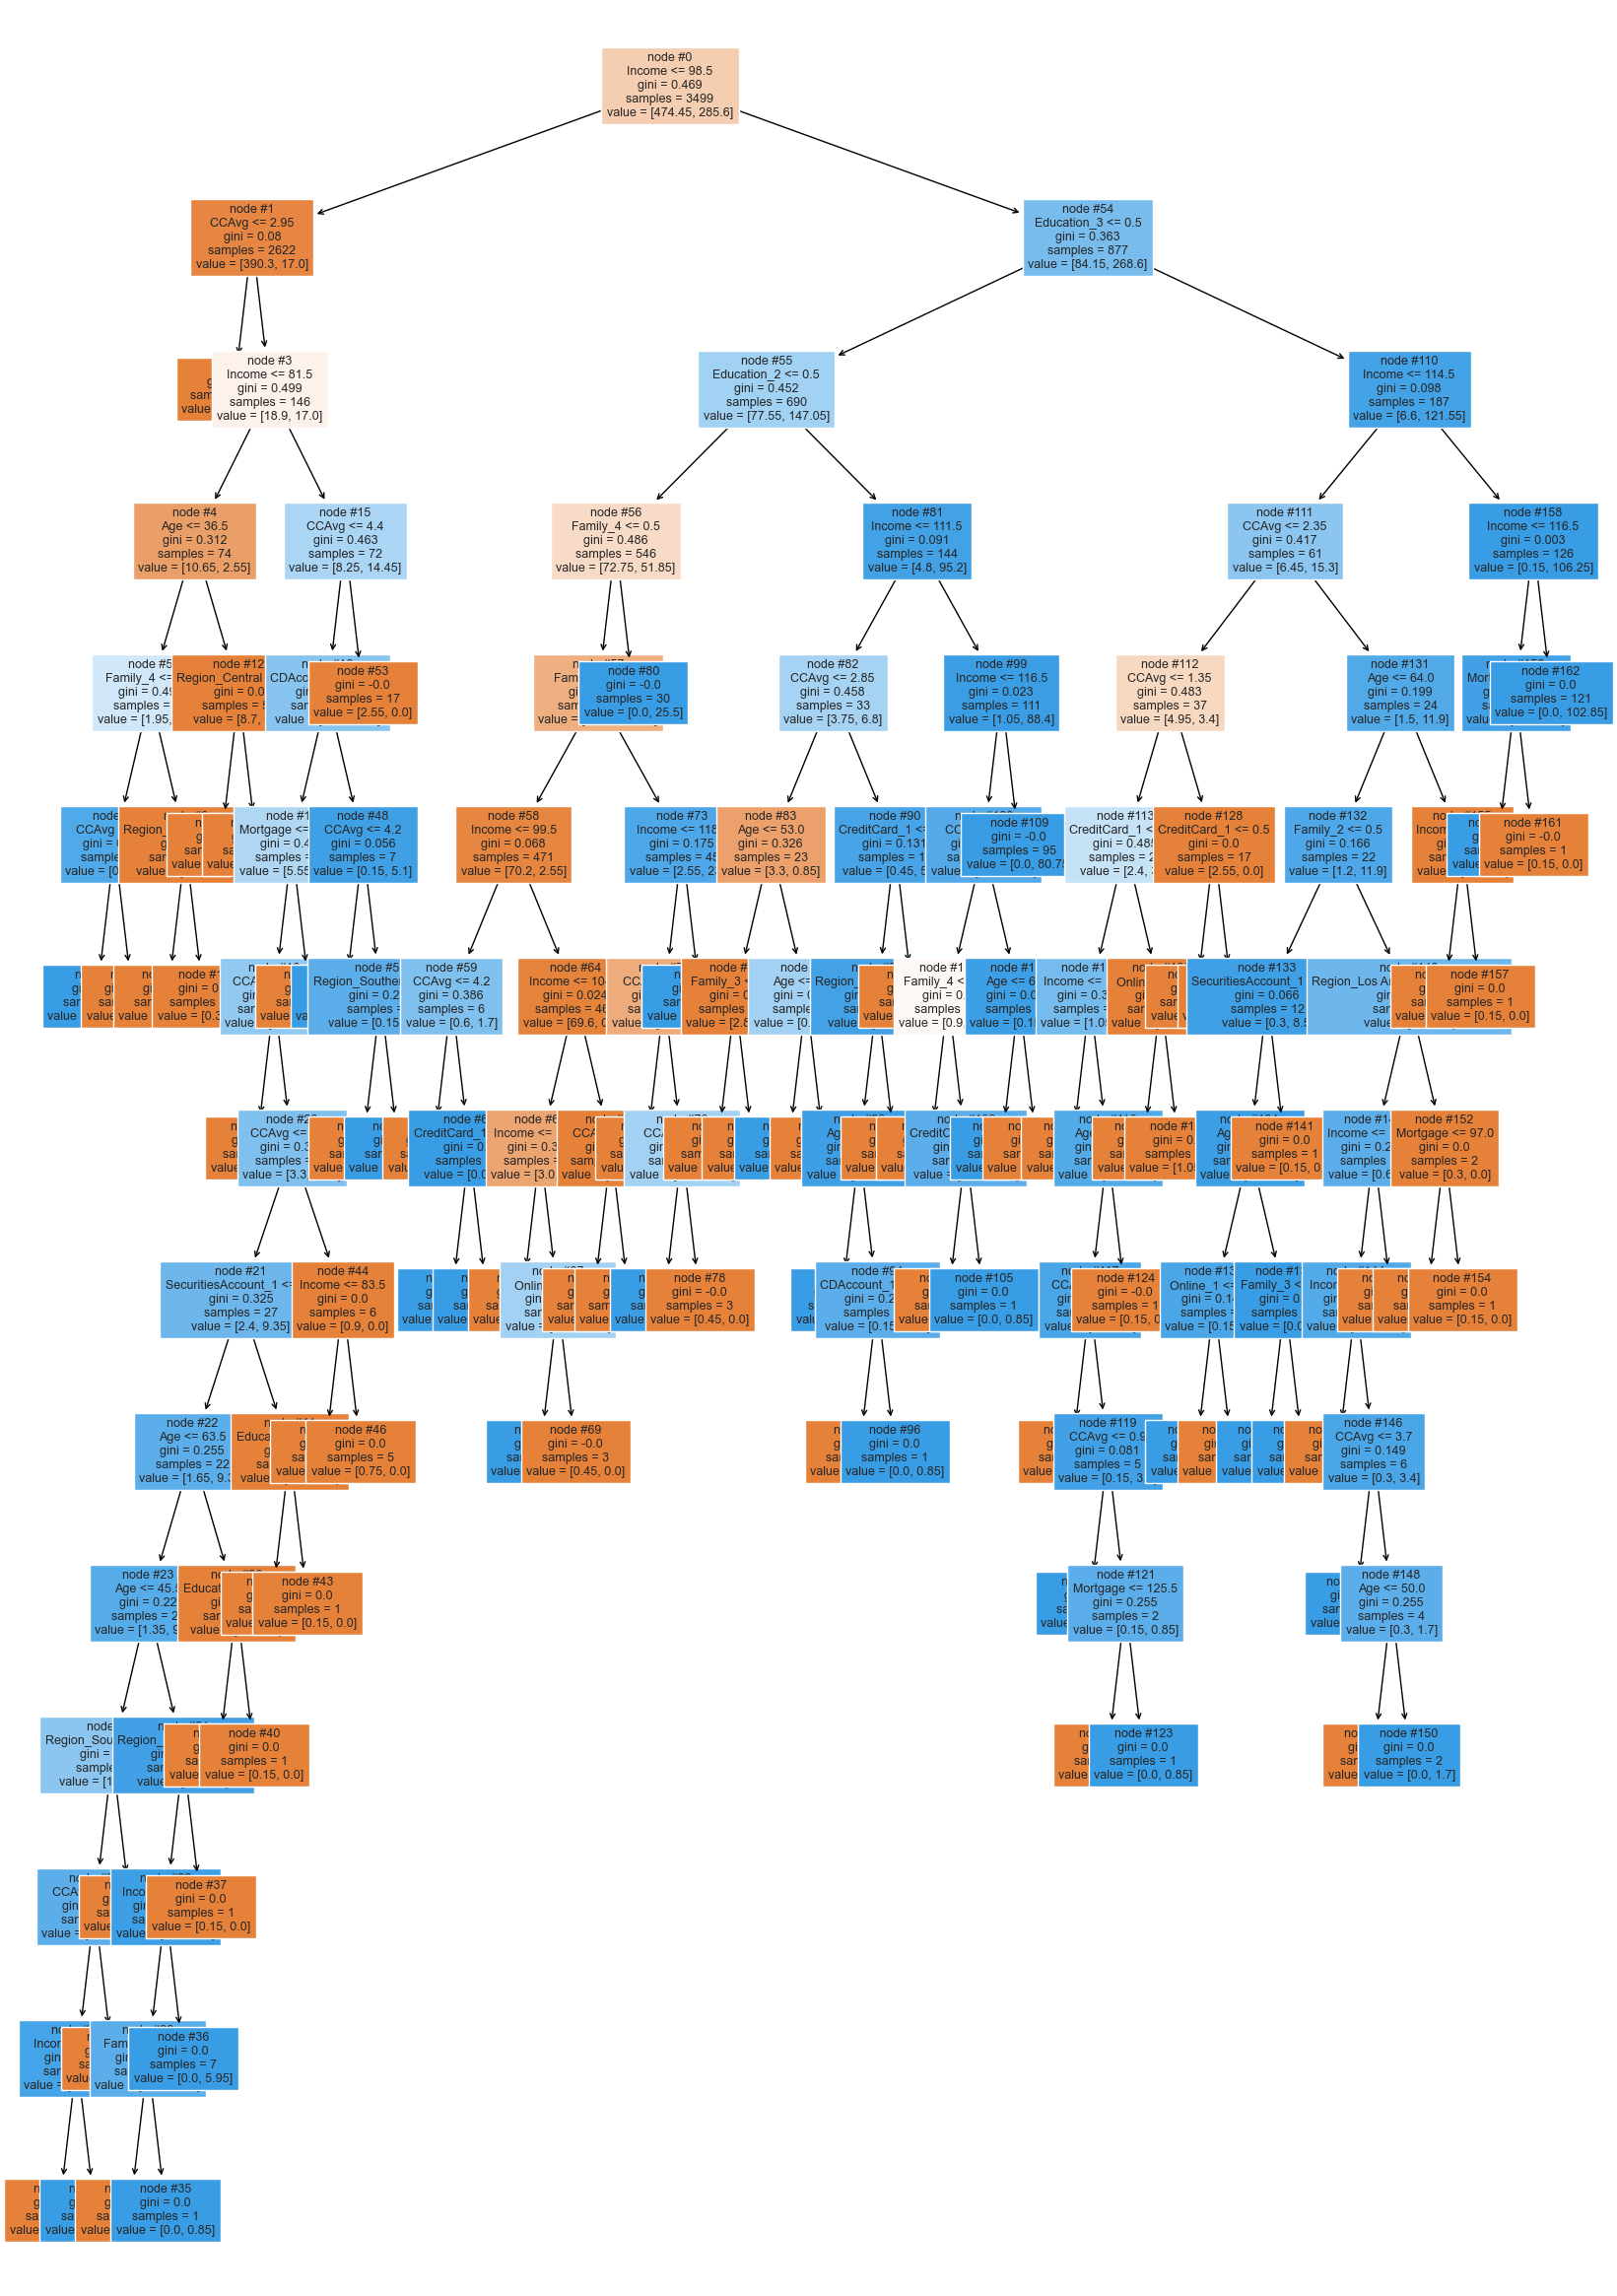

In [145]:
plt.figure(figsize = (20,30))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(model, feature_names = feature_names, filled=True, fontsize=9, node_ids=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
        
plt.show()

In [146]:
# export text report showing the rules of secision tree
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- Region_Central <= 0.50
|   |   |   |   |   |   |--- weights: [1.35, 0.00] class: 0
|   |   |   |   |   |--- Region_Central >  0.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- Region_Central <= 0.50
|   |   |   |   |   |--- weights: [8.25, 0.00] class: 0
|   |   |   |   |--- Region_Central >  0.50
|   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- CDAccount_1 <= 0.50
|   |  

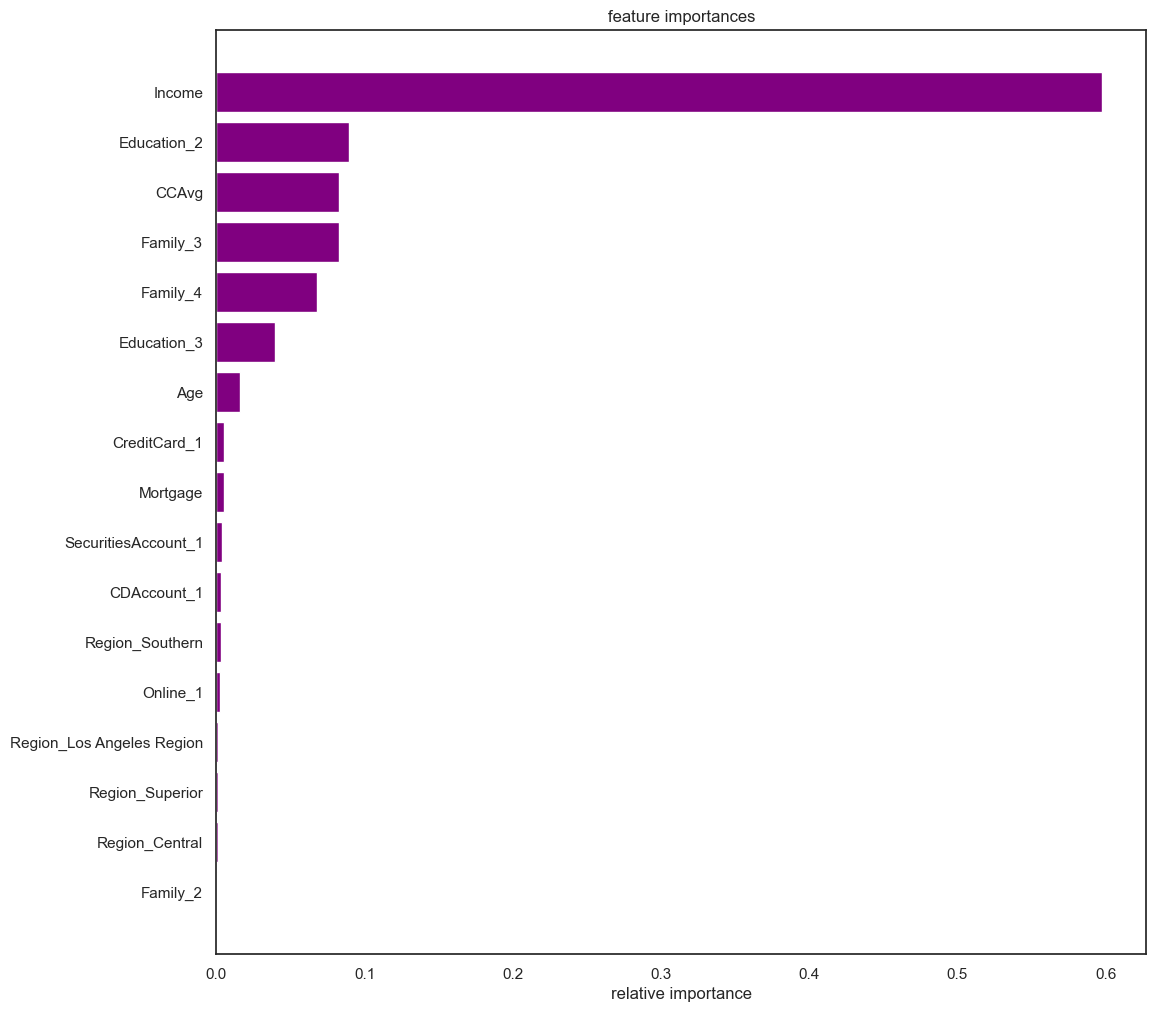

In [147]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('feature importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('relative importance')
plt.show()

In [148]:
# choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1)
# Grid of parameter to choose from

parameters = {'max_depth' : np.arange(1,10),
             'min_samples_leaf' : [1,2,5,7,10,15,20],
             'max_leaf_nodes' : [5,10,15,20,25,30],}

#type of scoring used to compare parameter combination
acc_scorer = metrics.make_scorer(metrics.recall_score)

#run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train_dt, y_train_dt)

#set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=30, min_samples_leaf=2,
                       random_state=1)

In [149]:
# fit the best algo the the data
estimator.fit(x_train_dt, y_train_dt)
ytrain_predict = estimator.predict(x_train_dt)
ytest_predict = estimator.predict(x_test_dt)

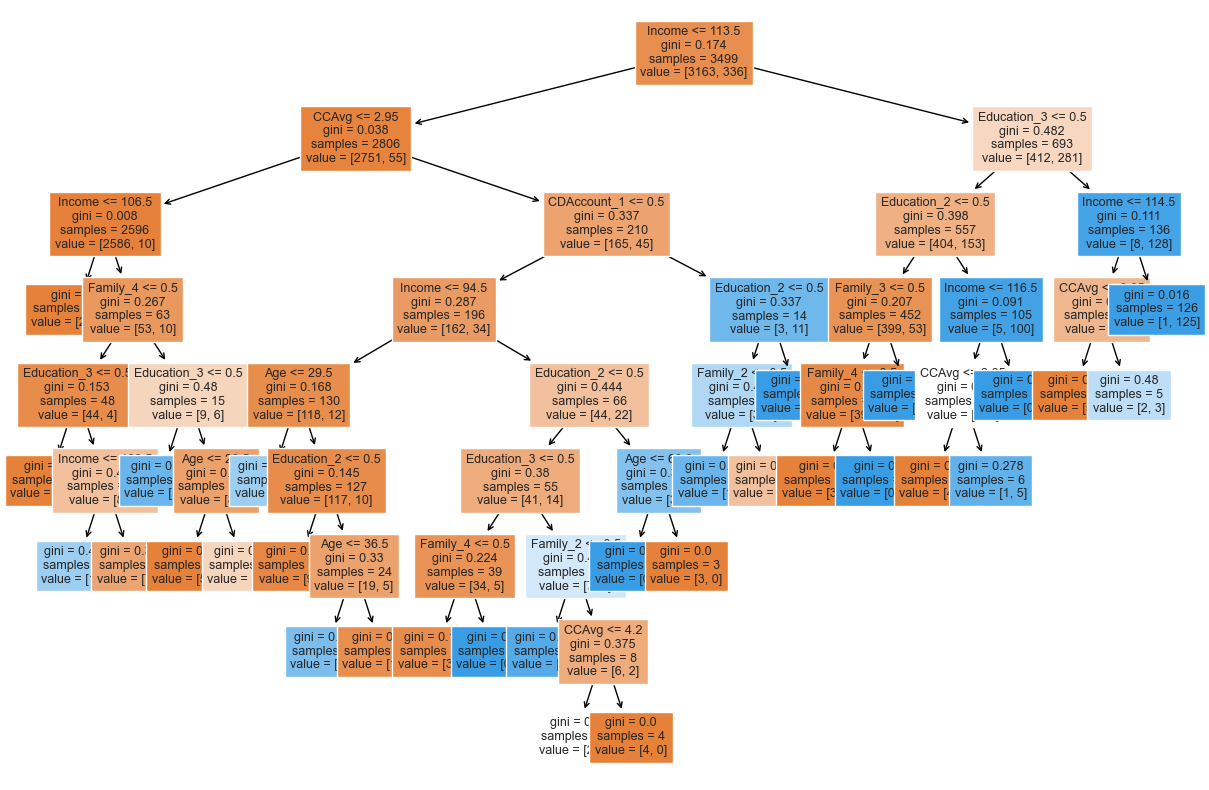

In [150]:
plt.figure(figsize=(15,10))

out= tree.plot_tree(estimator, feature_names=feature_names, filled=True, fontsize=9, node_ids=False)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
        
plt.show()

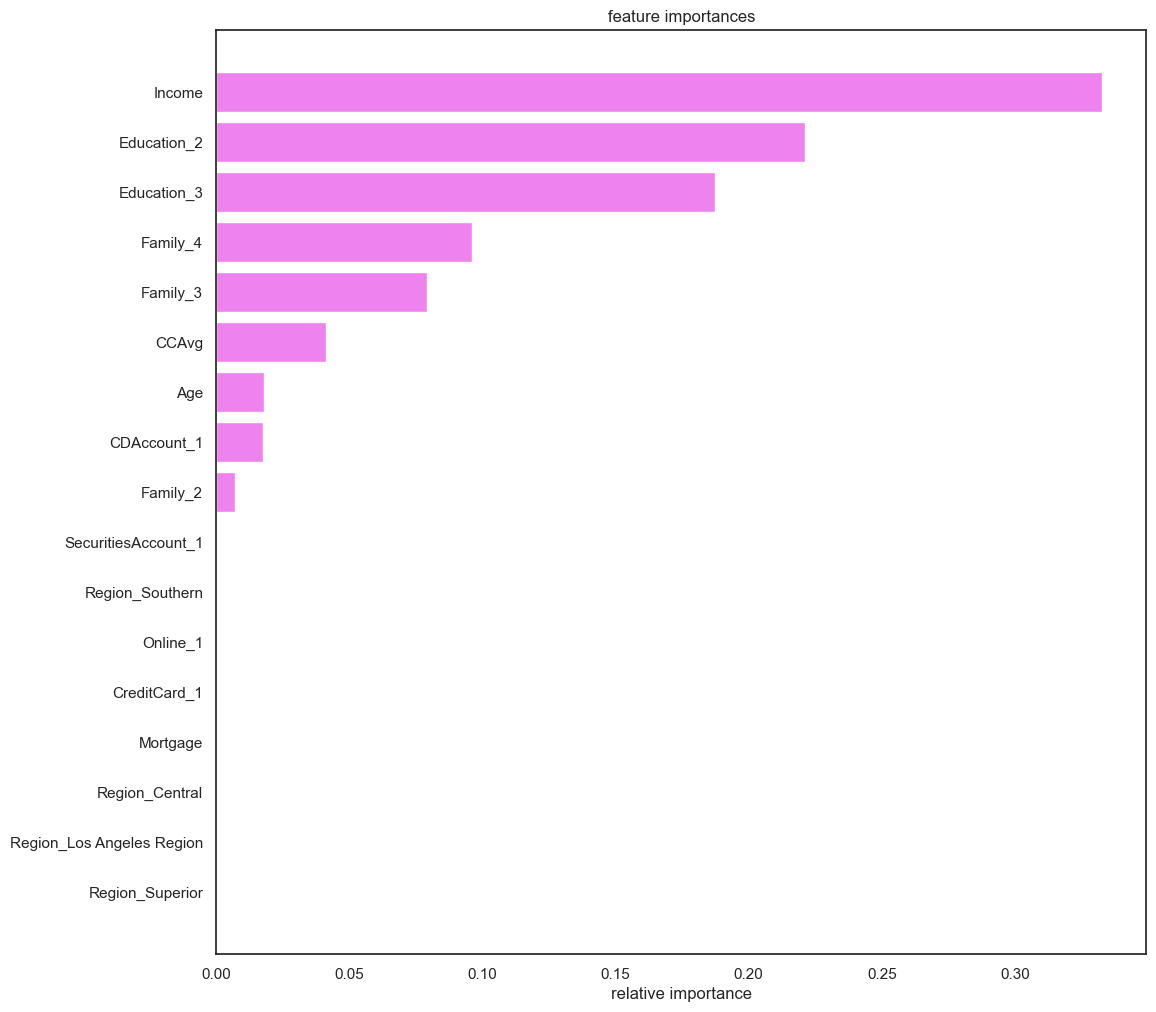

In [151]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('feature importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('relative importance')
plt.show()

 Accuracy : Train : 0.992283509574164  Test :  0.984
 Accuracy : Train : 0.9494047619047619  Test :  0.9166666666666666


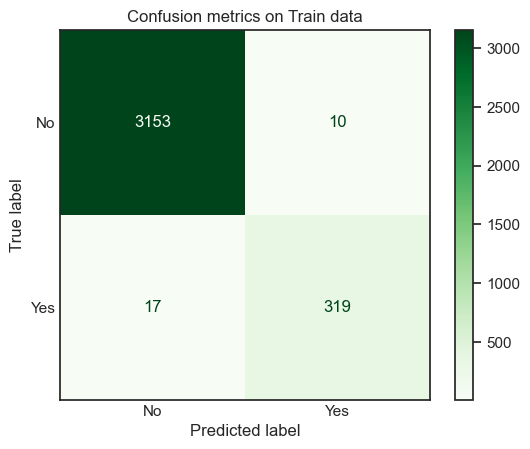

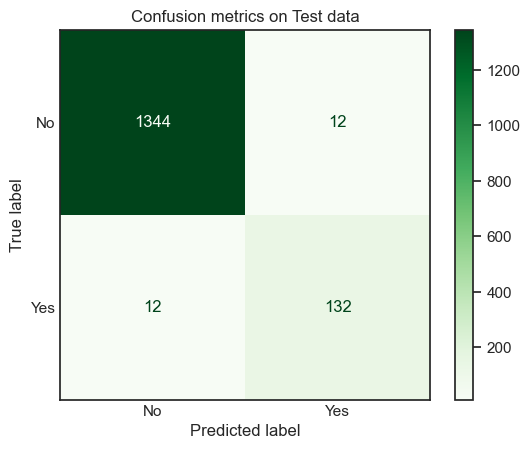

In [152]:
get_recall_score(estimator)

Top Down Approach  - external constraints - tree stops as and when any one of the constraints is reached

Bottom Up Approach - Allow the tree grow till full depth... later prune off some of the branches of the tree which are not needed

# Cost Complexity Pruning

In [153]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train_dt, y_train_dt)
ccp_alphas , impurities = path.ccp_alphas, path.impurities

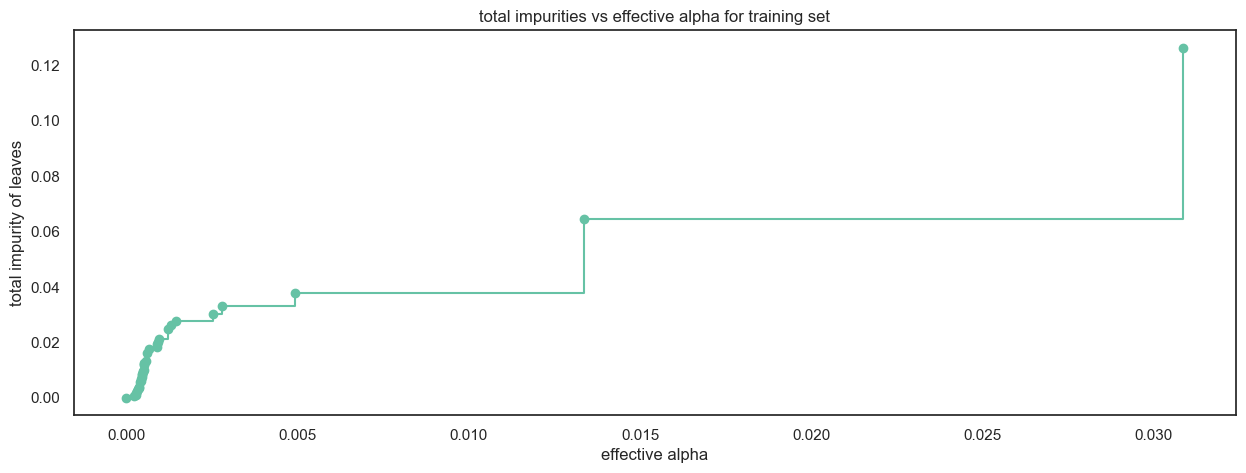

In [154]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("total impurities vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.

In [155]:
clfs = []
accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight = {0:0.15, 1:0.85})
    clf.fit(x_train_dt, y_train_dt)
    
    y_train_pred = clf.predict(x_train_dt)
    y_test_pred = clf.predict(x_test_dt)
    
    accuracy_train.append(clf.score(x_train_dt, y_train_dt))
    accuracy_test.append(clf.score(x_test_dt, y_test_dt))
    
    recall_train.append(metrics.recall_score(y_train_dt, y_train_pred))
    recall_test.append(metrics.recall_score(y_test_dt, y_test_pred))
    
    clfs.append(clf)

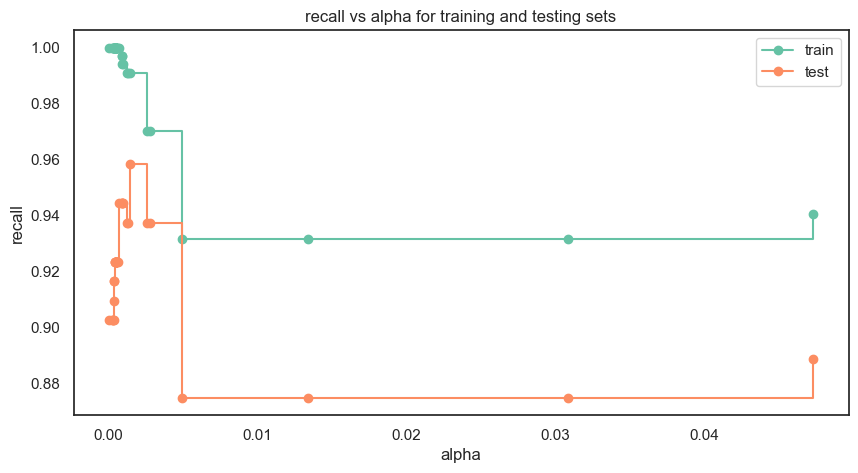

In [156]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlabel("alpha")
ax.set_ylabel("recall")
ax.set_title("recall vs alpha for training and testing sets")


ax.plot(ccp_alphas, recall_train, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

We are getting a higher recall on test data between 0.002 to 0.005. Will choose alpha as 0.002.

Creating model with 0.002 ccp_alpha

In [157]:
best_model  = DecisionTreeClassifier(ccp_alpha=.002,
                                    class_weight={0:0.15, 1:0.85}, random_state=1)
best_model.fit(x_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

 Accuracy : Train : 0.9794226921977708  Test :  0.9753333333333334
 Accuracy : Train : 0.9791666666666666  Test :  0.9583333333333334


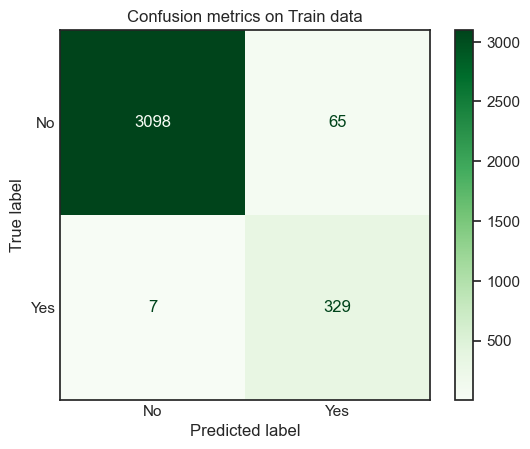

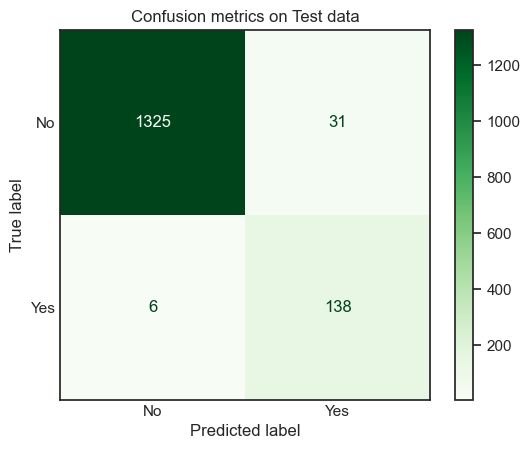

In [158]:
get_recall_score(best_model)

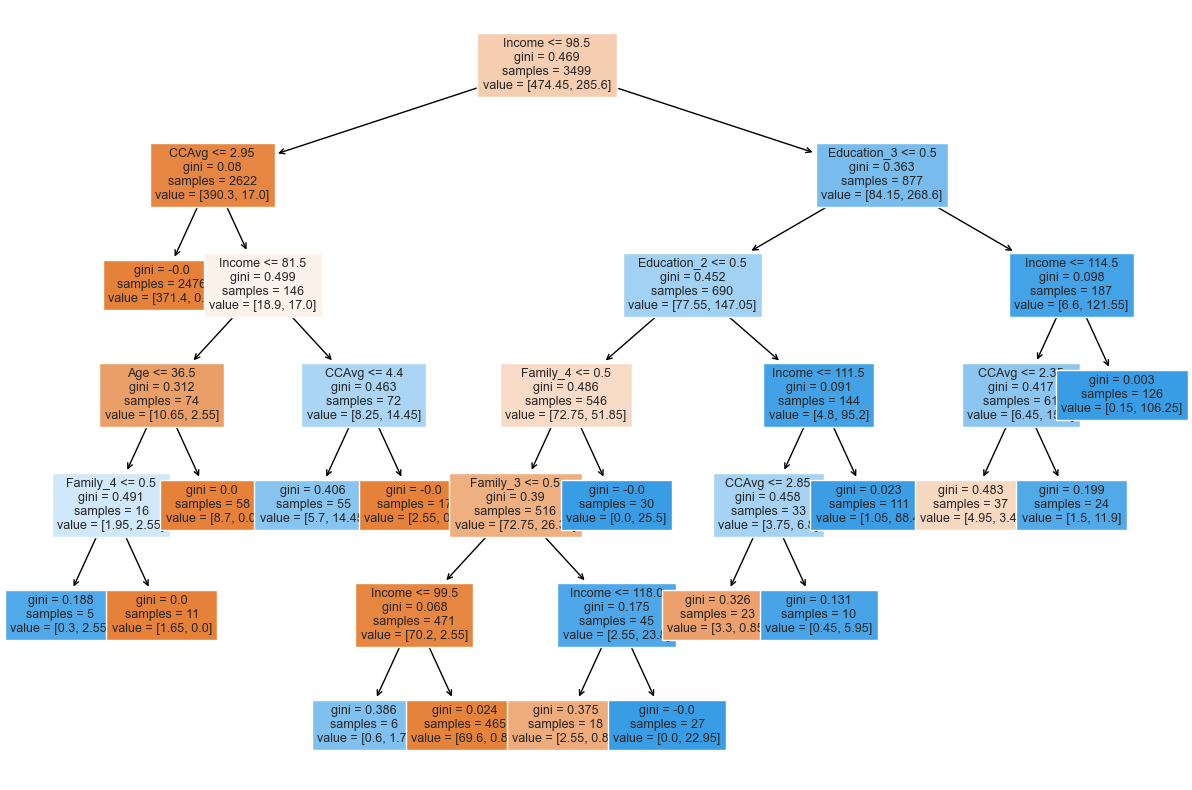

In [160]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model, feature_names=feature_names, filled=True, fontsize=9, node_ids=False)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()


In [162]:
# text report showing the rules of a decision tree
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [0.30, 2.55] class: 1
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [8.70, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- weights: [5.70, 14.45] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [2.55, 0.00] class: 0
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- Income <= 99.50
|   |   |   |   |   |   |--- weights: [0.60, 1.70] class: 1
|   |   |   |   |   |--- Income >  99.50
|   |   |   |   |   |   |--- weights: [69.60, 0.85] class: 0
|   

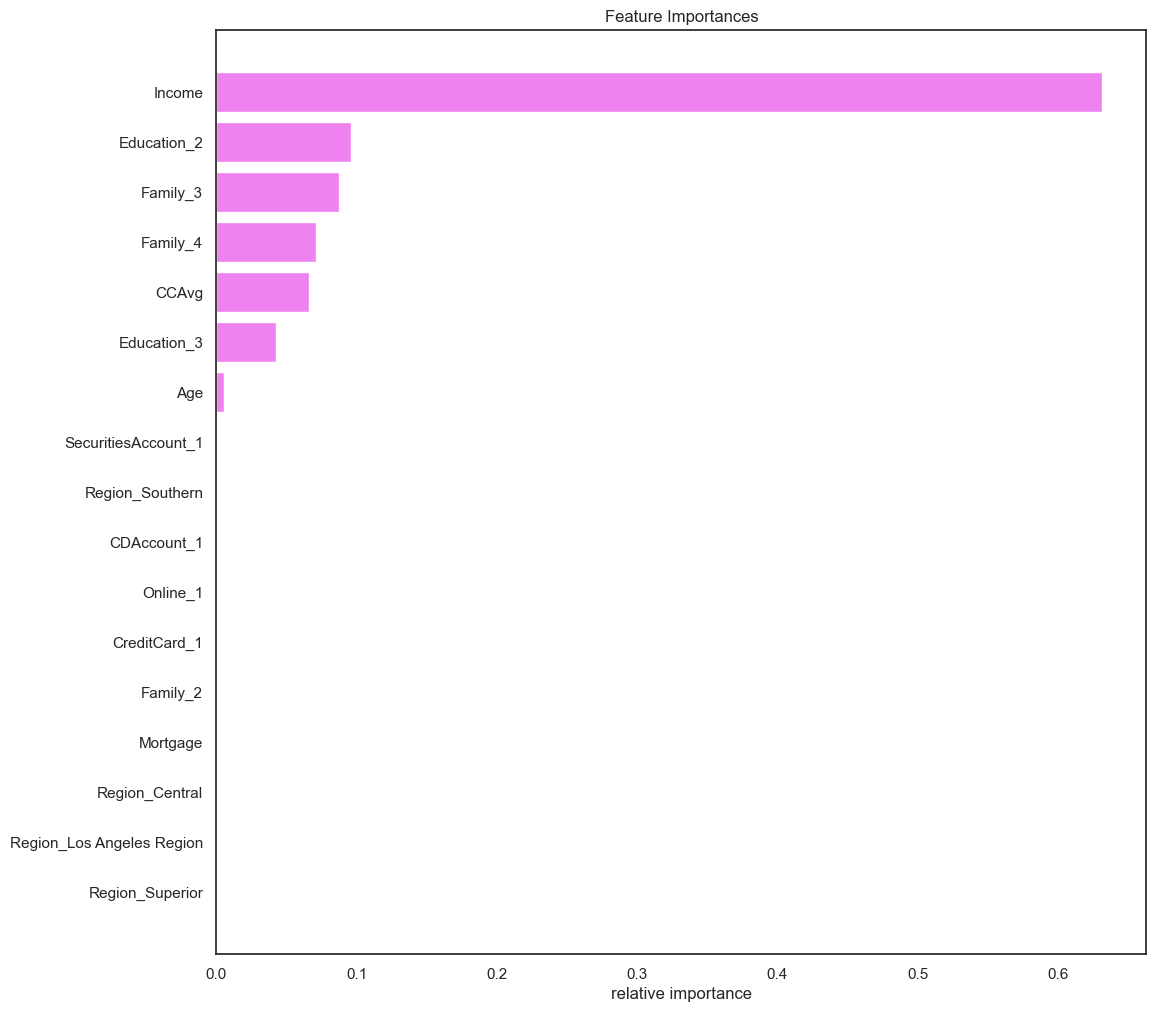

In [163]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('relative importance')
plt.show()


# Comparing all the model performances

In [164]:
comparison_frame = pd.DataFrame({'Model':['Logisitic Regression with Optimal Threshold 0.104',
                                          'Initial decision tree model',
                                          'Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 
                                          'Train_accuracy':[0.92,1,0.99,0.98],
                                          'Test_accuracy':[0.91,0.98,0.98,0.97],
                                          'Train_Recall':[0.90,1,0.92,0.98], 
                                          'Test_Recall':[0.88,0.86,0.84,0.96]})  

comparison_frame

Model  Train_accuracy  \
0  Logisitic Regression with Optimal Threshold 0.104            0.92   
1                        Initial decision tree model            1.00   
2          Decision treee with hyperparameter tuning            0.99   
3                    Decision tree with post-pruning            0.98   

   Test_accuracy  Train_Recall  Test_Recall  
0           0.91          0.90         0.88  
1           0.98          1.00         0.86  
2           0.98          0.92         0.84  
3           0.97          0.98         0.96

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1356
           1       0.82      0.96      0.88       144

    accuracy                           0.98      1500
   macro avg       0.91      0.97      0.93      1500
weighted avg       0.98      0.98      0.98      1500



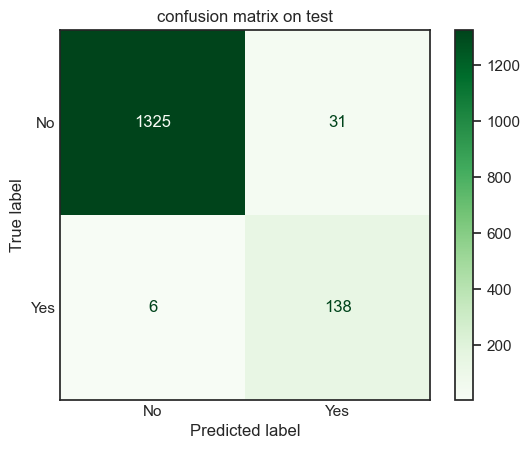

In [168]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix , ConfusionMatrixDisplay

y_pred = best_model.predict(x_test_dt)
print(classification_report(y_test_dt, y_pred))
make_confusion_matrix(y_test, y_pred, "confusion matrix on test")

[10:07 am, 24/02/2024] DS Sohini Sengupta: Conclusion 
We analyzed the Personal Loan campaign data using EDA and by using different models like Logistic Regression and Decision Tree Classifier to build a likelihood of Customer buying Loan.

First we built model using Logistic Regression and performance metric used was Recall. The most important features for classification were Income,Education, CD account ,Family and CCAvg .

Coefficient of Income, Graduate and Advanced Education, Family_3,Family 4,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan

Coefficient of Securities account,online ,Family_2 credit card are negative increase in these will lead to decrease in chances of a person borrowing a loan.


We also improved the performance using ROC-AUC curve and optimal threshold .This was best model with high recall and accuracy .
Decision tree can easily overfit.
[10:07 am, 24/02/2024] DS Sohini Sengupta: They require less datapreprocessing compared to logistic Regression and are easy to understand.

We used decision trees with prepruning and post pruning.
The Post pruning model gave 96 % recall with 97% accuracy.
Income, Customers with graduate degree, customers having 3 family members are some of the most important variables in predicting if the customers will purchase a personal loan.

In [169]:
# Misclassification analysis
misclass_df = x_test_dt.copy()

In [170]:
misclass_df['Actual'] = y_test_dt
misclass_df['Predicted'] = y_pred

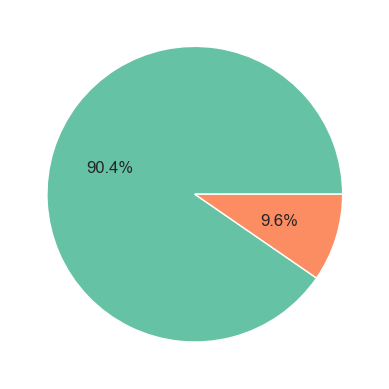

In [171]:
plt.pie(data=misclass_df, x=misclass_df['Actual'].value_counts(), autopct='%1.1f%%')
plt.show()

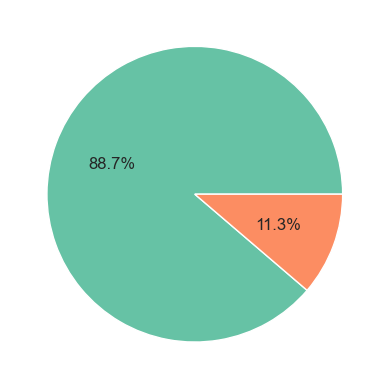

In [172]:
plt.pie(data=misclass_df, x=misclass_df['Predicted'].value_counts(), autopct='%1.1f%%')
plt.show()

Percentage of value predicted by our model has been very close to the actual values. Lets find out False Negative and False Positive observations

In [173]:
# rows that were classified as negative when they were actaully positive
fn_rows = misclass_df[(misclass_df['Actual'] == 1) & (misclass_df['Predicted'] == 0)]

In [174]:
False_negative = df_Decision[df_Decision.index.isin(fn_rows.index.values)].copy()
False_negative

Age  Income Family  CCAvg Education  Mortgage PersonalLoan  \
322    63     101      1   3.90         1         0            1   
1069   44      75      2   3.50         1         0            1   
1518   43      64      4   3.00         3       221            1   
2533   54     111      1   1.10         2         0            1   
2623   42     111      3   3.00         1         0            1   
2996   42     103      1   3.33         1         0            1   

     SecuritiesAccount CDAccount Online CreditCard              Region  
322                  1         1      1          0            Southern  
1069                 0         0      1          0  Los Angeles Region  
1518                 0         0      1          0            Bay Area  
2533                 0         0      1          0            Southern  
2623                 1         1      0          1            Bay Area  
2996                 1         1      1          1  Los Angeles Region

Our model predicted 6 customers wrongly. On analyzing the Income , Education,Family , we can see the income is not in range of High income group and education is undergrad for most of them and there average spending is also low. These cases are some exceptions.

In [175]:
# rows that were classified as positive when they were actually negative
fp_rows = misclass_df[(misclass_df['Actual'] == 0) & (misclass_df['Predicted'] == 1)]

In [176]:
fp_rows

Age  Income  CCAvg  Mortgage  Family_2  Family_3  Family_4  Education_2  \
3754   63     112   2.40         0         0         0         1            0   
950    32     112   1.80         0         0         0         1            1   
4419   42      85   3.70       272         0         0         0            0   
185    39     115   1.00         0         0         0         0            0   
4815   58      99   1.40         0         1         0         0            0   
683    40      82   3.60         0         0         0         0            1   
640    43      85   3.70       327         0         0         0            0   
4570   32      99   4.50       249         1         0         0            0   
1303   29     112   2.00       382         1         0         0            1   
82     41      82   4.00         0         0         0         0            0   
3409   29     113   2.00        84         1         0         0            1   
3081   36      78   4.50       204         1         0         0            0   
3064   59      83   4.40         0         0         1         0            0   
746    62      85   3.40         0         0         0         1            1   
2437   65     114   3.40         0         0         0         1            1   
731    28      90   3.30         0         1         0         0            0   
986    53     101   4.90         0         0         0         1            0   
4671   39     104   4.00         0         0         0         0            0   
3468   43     113   1.80         0         1         0         0            1   
621    41     114   1.80         0         1         0         0            1   
10     65     105   2.40         0         0         0         1            0   
1910   43      83   3.80       112         1         0         0            0   
792    41      98   4.00         0         0         0         0            0   
973    43      85   4.00       287         0         0         0            0   
3263   32      84   3.40         0         0         0         1            0   
4678   33     115   2.70       283         0         0         0            1   
4492   56      91   3.00         0         0         0         0            0   
1401   40      84   3.70         0         0         0         0            0   
1263   35      85   4.00         0         0         0         1            0   
3322   41     104   4.00         0         0         0         0            0   
932    51     112   1.80         0         0         1         0            1   

      Education_3  SecuritiesAccount_1  CDAccount_1  Online_1  CreditCard_1  \
3754            1                    0            0         1             1   
950             0                    0            0         1             0   
4419            1                    0            0         0             0   
185             1                    0            0         1             0   
4815            0                    0            0         0             1   
683             0                    0            0         0             0   
640             1                    1            0         1             0   
4570            1                    0            0         1             0   
1303            0                    1            0         0             0   
82              1                    0            0         1             0   
3409            0                    0            0         1             1   
3081            1                    0            0         1             1   
3064            0                    0            0         1             0   
746             0                    0            0         1             0   
2437            0                    0            0         0             1   
731             0                    0            0         1             1   
986             0                    0            0         1         

In [177]:
False_positive = df_Decision[df_Decision.index.isin(fp_rows.index.values)].copy()
False_positive

Age  Income Family  CCAvg Education  Mortgage PersonalLoan  \
10     65     105      4   2.40         3         0            0   
82     41      82      1   4.00         3         0            0   
185    39     115      1   1.00         3         0            0   
621    41     114      2   1.80         2         0            0   
640    43      85      1   3.70         3       327            0   
683    40      82      1   3.60         2         0            0   
731    28      90      2   3.30         1         0            0   
746    62      85      4   3.40         2         0            0   
792    41      98      1   4.00         3         0            0   
932    51     112      3   1.80         2         0            0   
950    32     112      4   1.80         2         0            0   
973    43      85      1   4.00         3       287            0   
986    53     101      4   4.90         1         0            0   
1263   35      85      4   4.00         3         0            0   
1303   29     112      2   2.00         2       382            0   
1401   40      84      1   3.70         3         0            0   
1910   43      83      2   3.80         3       112            0   
2437   65     114      4   3.40         2         0            0   
3064   59      83      3   4.40         1         0            0   
3081   36      78      2   4.50         3       204            0   
3263   32      84      4   3.40         1         0            0   
3322   41     104      1   4.00         3         0            0   
3409   29     113      2   2.00         2        84            0   
3468   43     113      2   1.80         2         0            0   
3754   63     112      4   2.40         3         0            0   
4419   42      85      1   3.70         3       272            0   
4492   56      91      1   3.00         3         0            0   
4570   32      99      2   4.50         3       249            0   
4671   39     104      1   4.00         3         0            0   
4678   33     115      1   2.70         2       283            0   
4815   58      99      2   1.40         1         0            0   

     SecuritiesAccount CDAccount Online CreditCard              Region  
10                   0         0      0          0            Bay Area  
82                   0         0      1          0            Southern  
185                  0         0      1          0            Southern  
621                  0         0      1          0  Los Angeles Region  
640                  1         0      1          0            Bay Area  
683                  0         0      0          0  Los Angeles Region  
731                  0         0      1          1  Los Angeles Region  
746                  0         0      1          0            Bay Area  
792                  0         0      0          1            Southern  
932                  1         1      1          1            Bay Area  
950                  0         0      1          0            Bay Area  
973                  0         0      1          0            Southern  
986                  0         0      1          0  Los Angeles Region  
1263                 0         0      1          0            Southern  
1303                 1         0      0          0            Bay Area  
1401                 0         0      1          0            Bay Area  
1910                 0         0      0          0             Central  
2437                 0         0      0          1            Bay Area  
3064                 0         0      1          0            Bay Area  
3081                 0         0      1          1            Bay Area  
3263                 0         0      1          0            Southern  
3322                 0         1      1          1            Southern  
3409                 0         0      1          1             Central  
3468                 0         0      0          1            Bay Area  
3754

Recommendation

Decision trees doesn't require to much data preparation or handling of outliers like logistic regression. 
They are easy to understand. 
Decision tress can easily overfit , so we have to be careful using decision tree.

Based on EDA, logistic Regression , Decision tree , Income ,Educatoin,Family,CCavg are most important factor.

Customers who have income above 98k dollars , Advance/graduate level education, a family of more than 2, such customers have higher chances of taking personal loans.

So for this campaign we can have different profiles for customers.

High Profile Clients :-Higher income,Advanced/Graduate level education, 3 /4 Family members,high spending

Average Profile :- Medium income group,Graduate level education.3/4Family members,medium spending

Low Profile:-Lower income group,undergrads ,3/4Family Member,low spending

Customer Average Spending and Mortages can also be looked upon as based on EDA and logistic Regression this parameters also play some role in likelihood of buy loan.

We can 1st target high profile customers , by providing them with a personal relationship managers who can address there concerns and can pursue them to buy loan from the bank with completive interest rates.

Prequalifying for Loan can also attract more customers.

Our 2nd target would be Medium profile customers.

The model cannot identify well if there are some exceptional cases when low profile customer is ready to buy a personal loan.